<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Validation-of-vis_cpu-against-pyuvsim-reference-simulations" data-toc-modified-id="Validation-of-vis_cpu-against-pyuvsim-reference-simulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Validation of <code>vis_cpu</code> against <code>pyuvsim</code> reference simulations</a></span><ul class="toc-item"><li><span><a href="#Setup-and-Metadata" data-toc-modified-id="Setup-and-Metadata-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup and Metadata</a></span><ul class="toc-item"><li><span><a href="#Abstract" data-toc-modified-id="Abstract-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Abstract</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Software" data-toc-modified-id="Software-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Software</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#{First-Working-Section-Title}" data-toc-modified-id="{First-Working-Section-Title}-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>{First Working Section Title}</a></span><ul class="toc-item"><li><span><a href="#ref_1.1_uniform.uvfits" data-toc-modified-id="ref_1.1_uniform.uvfits-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>ref_1.1_uniform.uvfits</a></span></li><li><span><a href="#ref_1.2_uniform.uvfits" data-toc-modified-id="ref_1.2_uniform.uvfits-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>ref_1.2_uniform.uvfits</a></span></li><li><span><a href="#ref_1.2_gauss.uvfits" data-toc-modified-id="ref_1.2_gauss.uvfits-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>ref_1.2_gauss.uvfits</a></span></li></ul></li></ul></li></ul></div>

# Validation of `vis_cpu` against `pyuvsim` reference simulations

Jackson Sipple, Steven Murray, Piyanat Kittiwisit, and the HERA Validation Team

## Setup and Metadata

### Abstract

{Brief abstract with high-level discussion of goals.}

### Imports

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os

import hera_sim
from hera_sim.visibilities import VisCPU
import pyuvsim
import pyuvdata
import uvtools

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 16)
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.titlesize'] = 'large'

# {All Imports should go here}

In [24]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Description

In [25]:
print("Last executed: %s"%str(datetime.now()))

Last executed: 2020-05-11 04:46:58.390988


{If you installed the ``jupyter_contrib_nbextensions``, then enable the "Python Markdown" extension, remove the line above, and keep the following line. Otherwise, remove the following line and keep the line above.}

Last executed: {str(datetime.now())}

- **Major Step Description:** {Insert standard description of major step}
- **Minor Variation Description:** {Insert standard description of minor step}
- **Pipelines Tested:** {Brief list of explicit pipelines tested in the notebook}
- **Criteria**:
  1. {Explicit Criterion for success 1}
  2. {Explicit Criterion for success 2}
  

### Summary

The results of this validation test, in reference to the outlined criteria, are
1. {Test results for criteria 1}
2. {Test results for criteria 2...}

{Brief notes on anything else interesting that was noted during testing}

### Software

HERA software used in this validation test, with associate git commit hash:

* {``pyuvdata``: `a8f6b6fdd7261`}
* {If you have the Python Markdown extension, you can do this: ``pyuvdata``: ``{pyuvdata.version.git_hash}``
* {``hera_qm``: `f3e32c3cef36cbd`}
* {etc.}

Versions of other software used in this validation test:

* {``numpy``: vx.x.x}
* {etc. (only list imported modules).}

### Data

The following paths reflect the exact locations of all data used in this test:

In [26]:
path_obs = "/lustre/aoc/projects/hera/jsipple/pyuvsim/reference_simulations/first_reference_simulations/"

obs_1_1_uniform = os.path.join(path_obs, "obsparam_ref_1.1.yaml")
obs_1_2_gauss = os.path.join(path_obs, "obsparam_ref_1.2_gauss.yaml")
obs_1_2_uniform = os.path.join(path_obs, "obsparam_ref_1.2_uniform.yaml")
obs_1_3_gauss = os.path.join(path_obs, "obsparam_ref_1.3_gauss.yaml")
obs_1_3_uniform = os.path.join(path_obs, "obsparam_ref_1.3_uniform.yaml")
obs_1_4_gauss = os.path.join(path_obs, "obsparam_ref_1.4.yaml")


path_ref = "/lustre/aoc/projects/hera/ref_sim/simulation_results/"

uvfits_ref_1_1_uniform= os.path.join(path_ref, "ref_1.1_uniform.uvfits")
uvfits_ref_1_2_gauss = os.path.join(path_ref, "ref_1.2_gauss.uvfits")
uvfits_ref_1_2_uniform = os.path.join(path_ref, "ref_1.2_uniform.uvfits")
uvfits_ref_1_3_gauss = os.path.join(path_ref, "ref_1.3_gauss.uvfits")
uvfits_ref_1_3_uniform = os.path.join(path_ref, "ref_1.3_uniform.uvfits")
uvfits_ref_1_4_gauss= os.path.join(path_ref, "ref_1.4_gauss.uvfits")

## {First Working Section Title}

{Put any desciptions etc. here and do your tests!}

{Here is an example image with an associated figure caption. Try to remember to use a semi-colon at the end of the code cell so that only the figure is shown.}

In [27]:
def compare_uvw(ref_UV, viscpu_UV):
    ref_u = ref_UV.uvw_array[:,0]
    ref_v = ref_UV.uvw_array[:,1]
    ref_w = ref_UV.uvw_array[:,2]

    viscpu_u = viscpu_UV.uvw_array[:,0]
    viscpu_v = viscpu_UV.uvw_array[:,1]
    viscpu_w = viscpu_UV.uvw_array[:,2]

    diff = {'u': ref_u - viscpu_u,
            'v': ref_v - viscpu_v,
            'w': ref_w - viscpu_w}

    fig, ax = plt.subplots(3,3)

    ax[0, 0].set_title("pyuvsim")
    ax[0, 1].set_title("vis_cpu")
    ax[0, 2].set_title("pyuvsim - vis_cpu")

    [axis.set_xlabel("u") for axis in ax[0]]
    ax[0, 0].set_ylabel("v")
    ax[0, 0].scatter(ref_u, ref_v)
    ax[0, 1].scatter(viscpu_u, viscpu_v)
    ax[0, 2].scatter(diff['u'], diff['v'])

    [axis.set_xlabel("u") for axis in ax[1]]
    ax[1, 0].set_ylabel("w")
    ax[1, 0].scatter(ref_u, ref_w)
    ax[1, 1].scatter(viscpu_u, viscpu_w)
    ax[1, 2].scatter(diff['u'], diff['w'])

    [axis.set_xlabel("v") for axis in ax[2]]
    ax[2, 0].set_ylabel("w")
    ax[2, 0].scatter(ref_v, ref_w)
    ax[2, 1].scatter(viscpu_v, viscpu_w)
    ax[2, 2].scatter(diff['v'], diff['w'])
    
    plt.figure()
    plt.title("Difference Vector Field")
    plt.xlabel("u")
    plt.ylabel("v")
    
    plt.quiver(ref_u, ref_v, diff['u'], diff['v'], np.sqrt(diff['u']**2 + diff['v']**2))
    plt.colorbar()

In [83]:
def compare_vis(ref_UV, viscpu_UV, xx_only=True):
    figsize = mpl.rcParams['figure.figsize']
    #mpl.rcParams['figure.figsize'] = (20, 10)
    
    ref_xx = ref_UV.data_array[:,:,:,0].flatten()
    vis_xx = viscpu_UV.data_array[:,:,:,0].flatten()
    
    if not xx_only:
        ref_xy = ref_UV.data_array[:,:,:,1].flatten()
        vis_xy = viscpu_UV.data_array[:,:,:,1].flatten()
        ref_yy = ref_UV.data_array[:,:,:,3].flatten()
        vis_yy = viscpu_UV.data_array[:,:,:,3].flatten()
    
    fig, ax = plt.subplots(4)
    fig.suptitle("Amplitude")
    ref_amp = np.abs(ref_xx)
    vis_amp = np.abs(vis_xx)
    ax[0].plot(ref_amp)
    ax[0].set_title("pyuvsim")
    ax[1].plot(vis_amp)
    ax[1].set_title("viscpu")
    ax[2].plot(ref_amp, label="pyuvsim")
    ax[2].plot(vis_amp, linestyle="--", label="viscpu") 
    ax[2].legend()
    ax[3].plot(ref_amp - vis_amp)
    ax[3].set_title("pyuvsim - viscpu")
    
    fig, ax = plt.subplots(4)
    fig.suptitle("Real Part")
    ref_real = np.real(ref_xx)
    vis_real = np.real(vis_xx)
    ax[0].plot(ref_real)
    ax[0].set_title("pyuvsim")
    ax[1].plot(vis_real)
    ax[1].set_title("viscpu")
    ax[2].plot(ref_real, label="pyuvsim")
    ax[2].plot(vis_real, linestyle="--", label="viscpu")
    ax[2].legend()
    ax[3].plot(ref_real - vis_real)
    ax[3].set_title("pyuvsim - viscpu")
    
    fig, ax = plt.subplots(4)
    fig.suptitle("Imaginary Part")
    ref_imag = np.imag(ref_xx)
    vis_imag = np.imag(vis_xx)
    ax[0].plot(ref_imag)
    ax[0].set_title("pyuvsim")
    ax[1].plot(vis_imag)
    ax[1].set_title("viscpu")
    ax[2].plot(ref_imag, label="pyuvsim")
    ax[2].plot(vis_imag, linestyle="--", label="viscpu")
    ax[2].legend()
    ax[3].plot(ref_imag - vis_imag)
    ax[3].set_title("pyuvsim - viscpu")
    
    mpl.rcParams['figure.figsize'] = figsize

### ref_1.1_uniform.uvfits

In [77]:
viscpu_sim = VisCPU(obsparams=obs_1_1_uniform)
viscpu_sim.simulate()
viscpu_UV = viscpu_sim.uvdata

invalid value encountered in sqrt


In [78]:
ref_UV = pyuvdata.UVData()
ref_UV.read(uvfits_ref_1_1_uniform)
ref_UV.unphase_to_drift()

In [79]:
print(np.max(np.abs(ref_UV.antenna_positions - viscpu_UV.antenna_positions)))

2.2737367544323206e-13


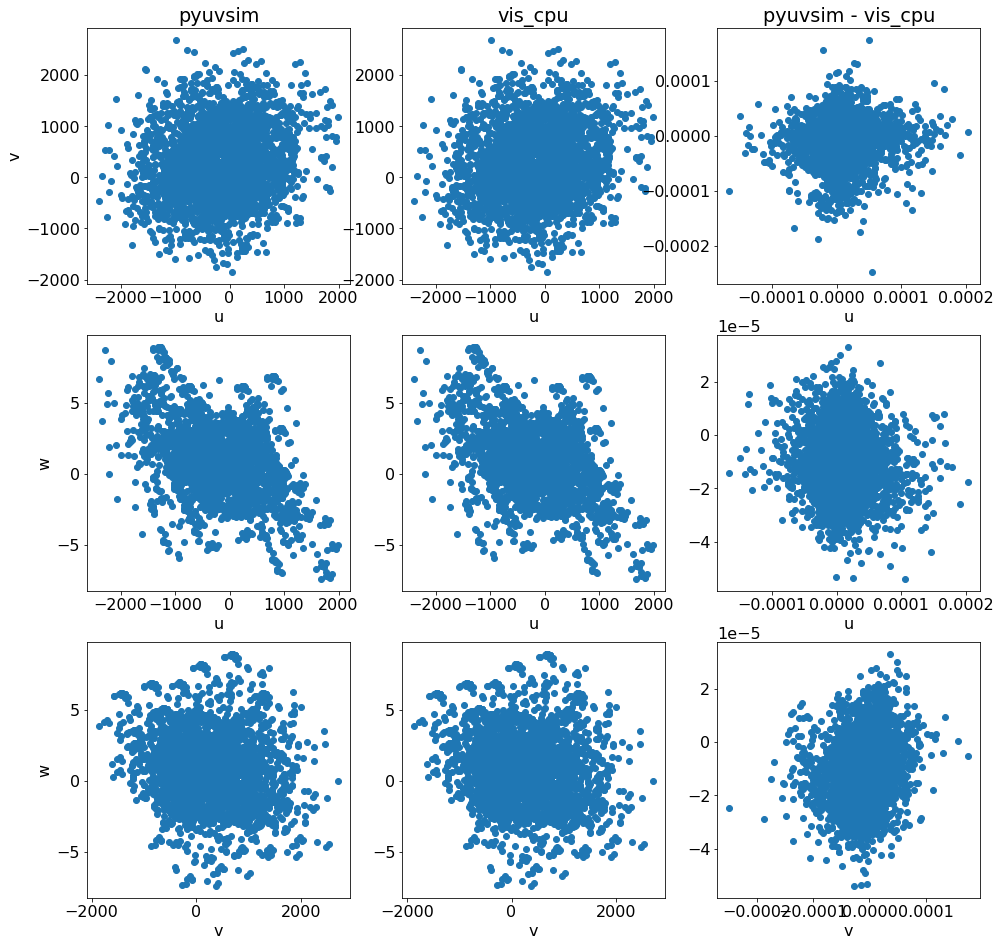

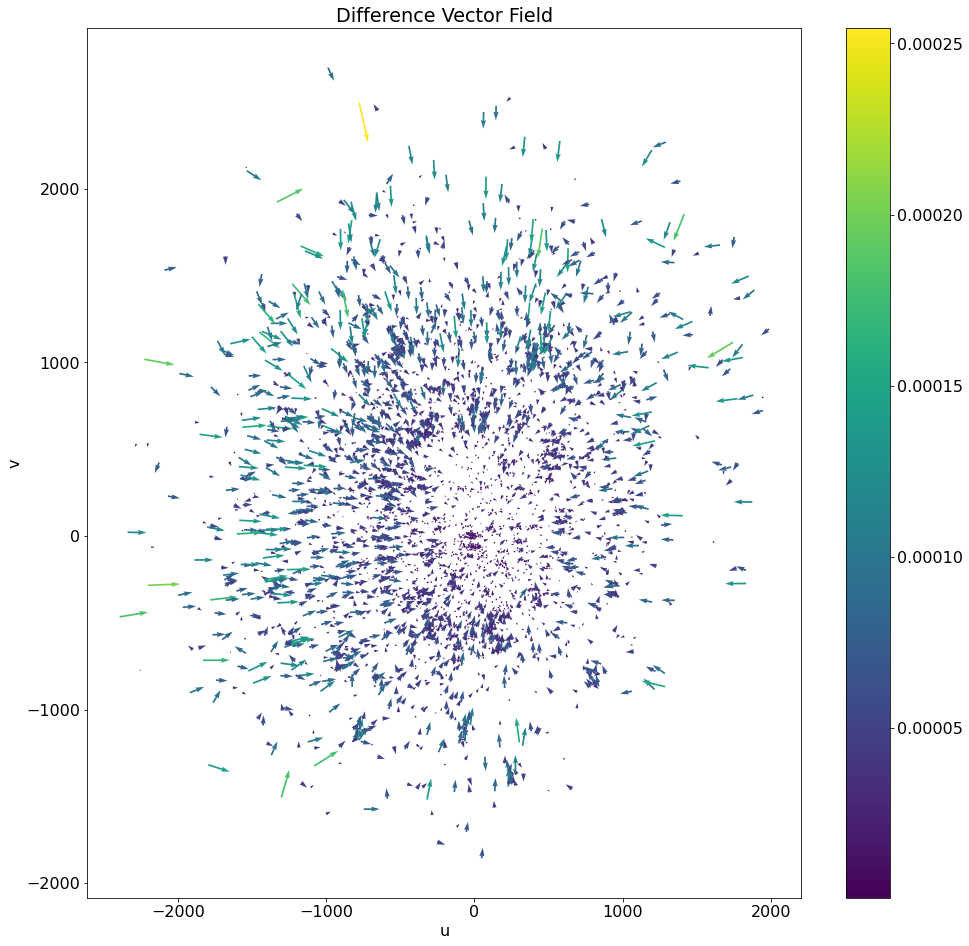

In [80]:
compare_uvw(ref_UV, viscpu_UV)

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
invalid value encountered in less_equal


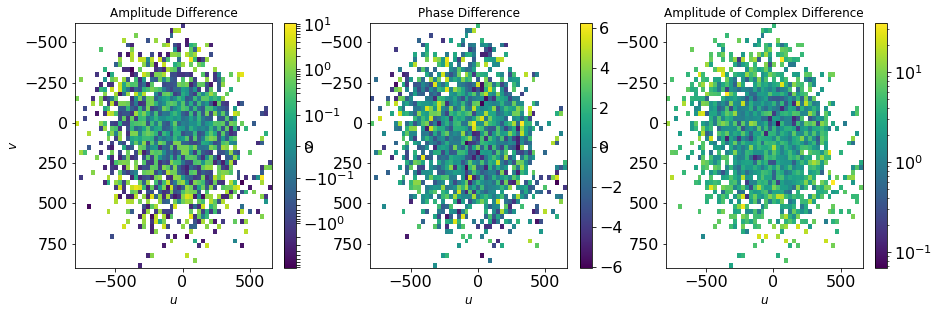

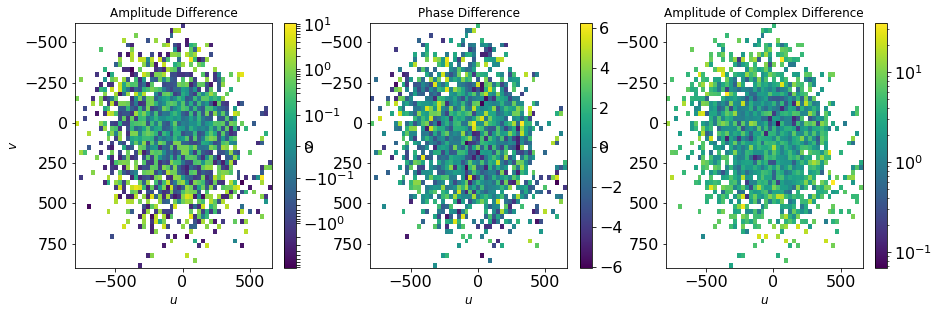

In [81]:
uvtools.plot.plot_diff_uv(ref_UV, viscpu_UV, check_metadata=False)

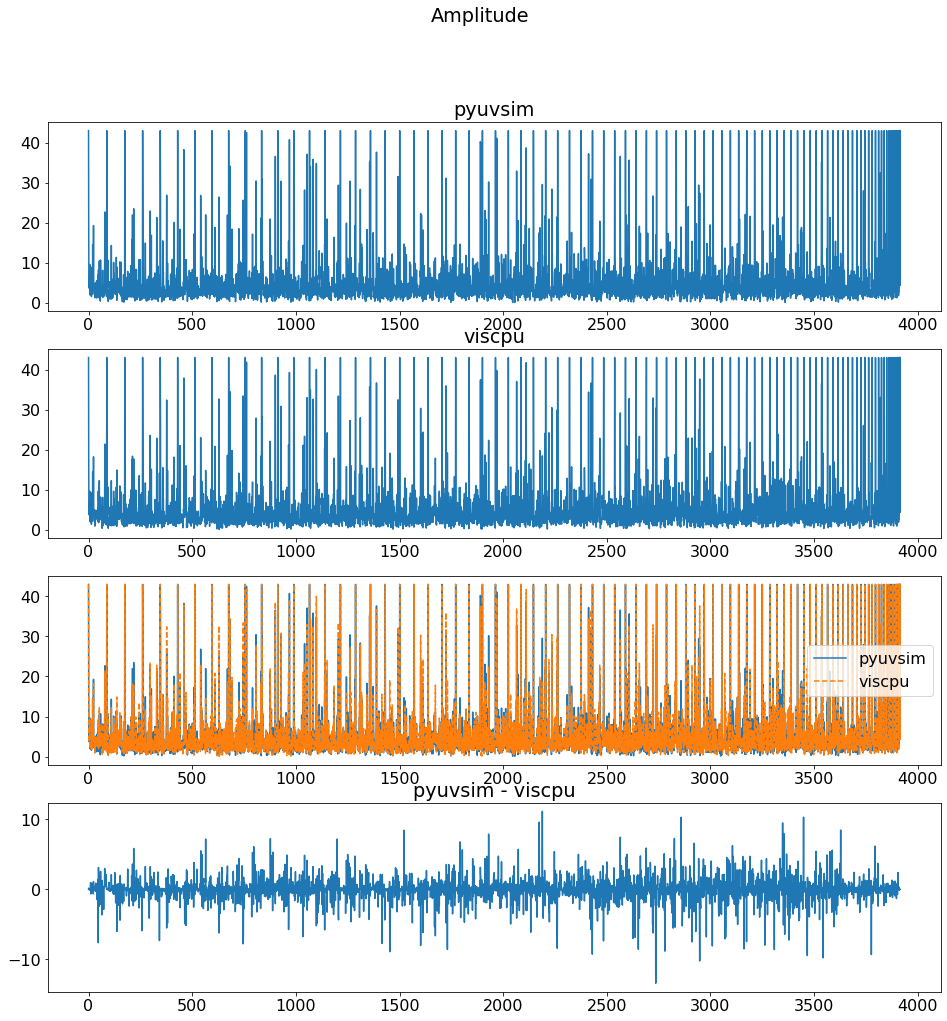

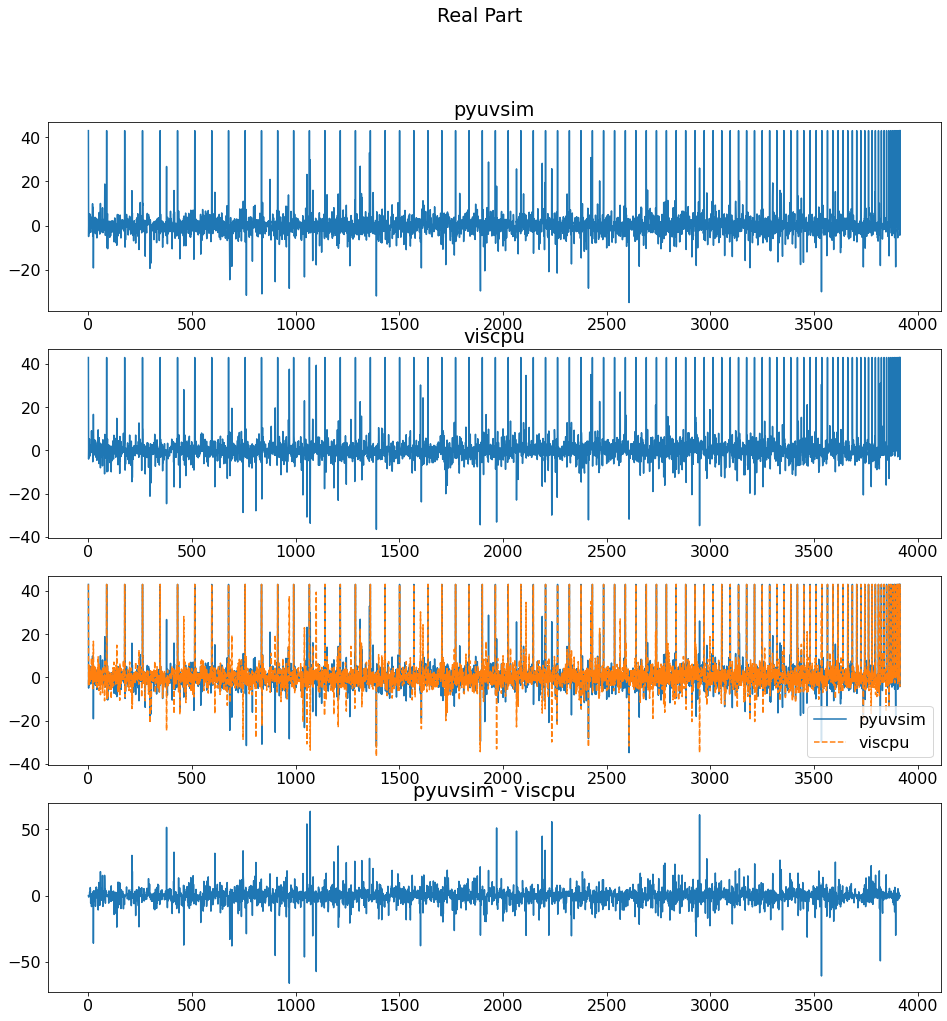

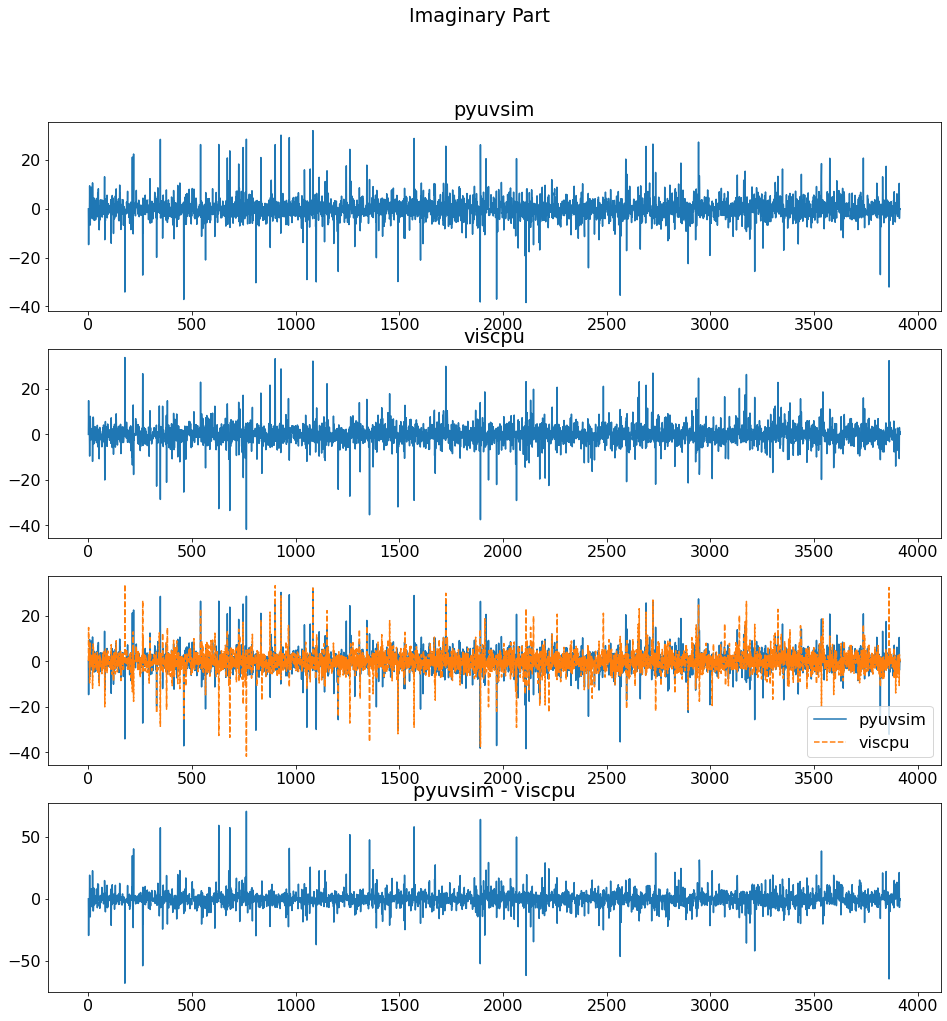

In [84]:
compare_vis(ref_UV, viscpu_UV)

### ref_1.2_uniform.uvfits

In [85]:
viscpu_sim = VisCPU(obsparams=obs_1_2_uniform)
viscpu_sim.simulate()
viscpu_UV = viscpu_sim.uvdata

invalid value encountered in sqrt


In [86]:
ref_UV = pyuvdata.UVData()
ref_UV.read(uvfits_ref_1_2_uniform)

Telescope BLLITE is not in known_telescopes.


In [87]:
print(np.max(np.abs(ref_UV.antenna_positions - viscpu_UV.antenna_positions)))

7.105427357601002e-15


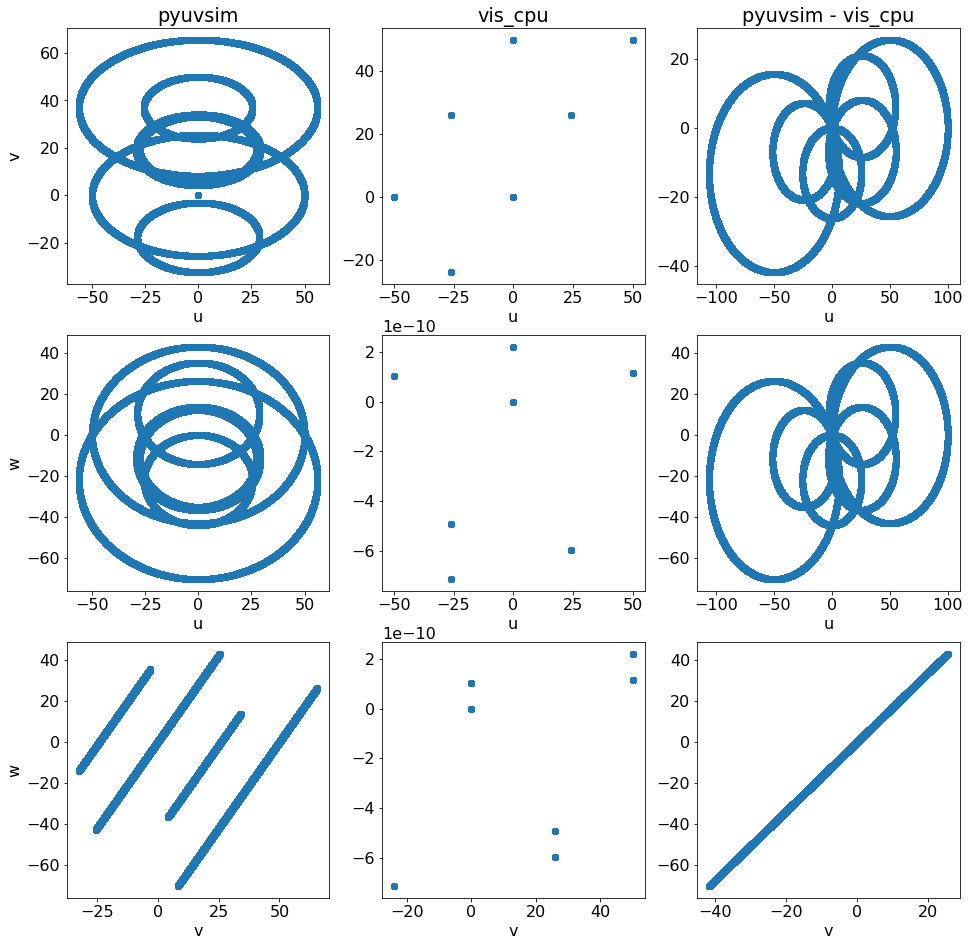

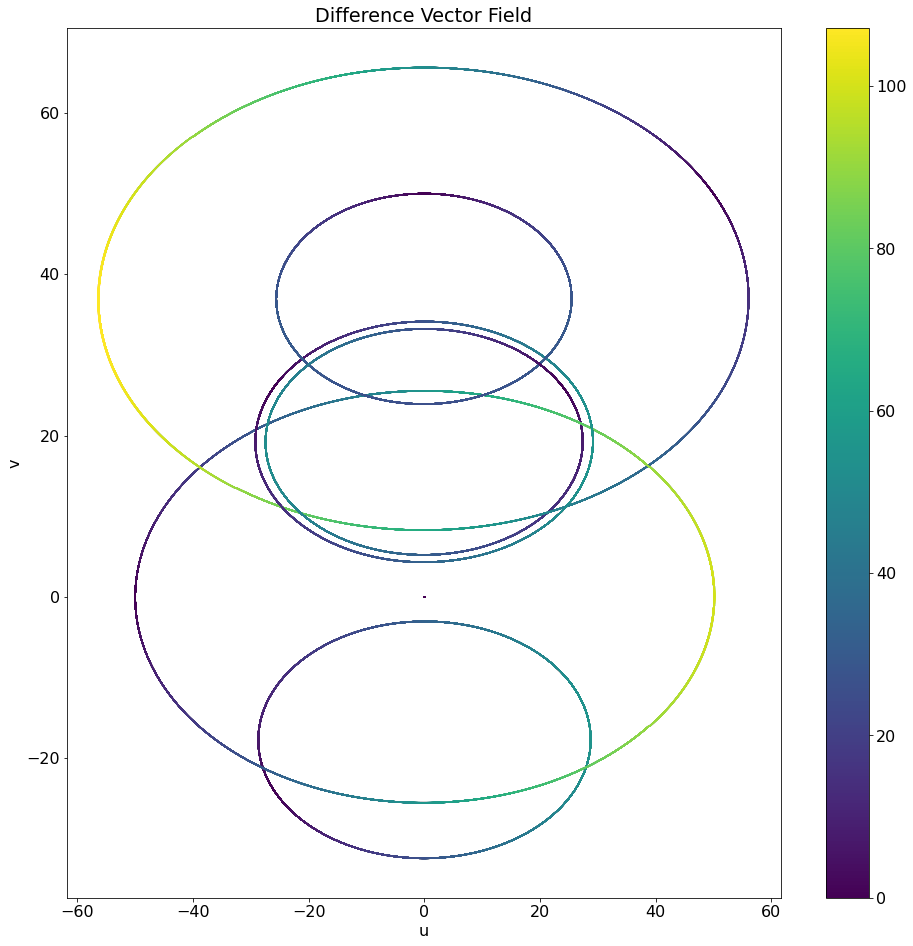

In [88]:
compare_uvw(ref_UV, viscpu_UV)

To properly compare the results of both simulations we unphase the `pyuvsim` reference simulation results

In [89]:
ref_UV.unphase_to_drift()

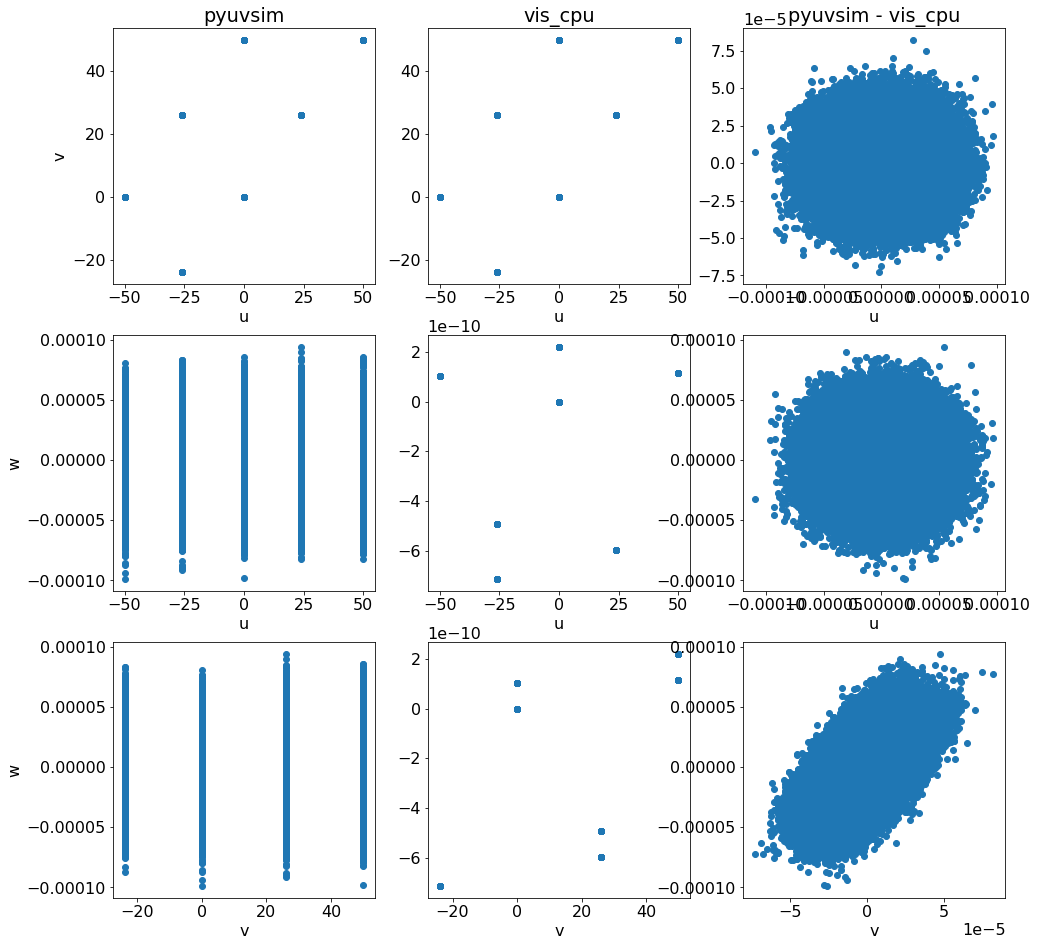

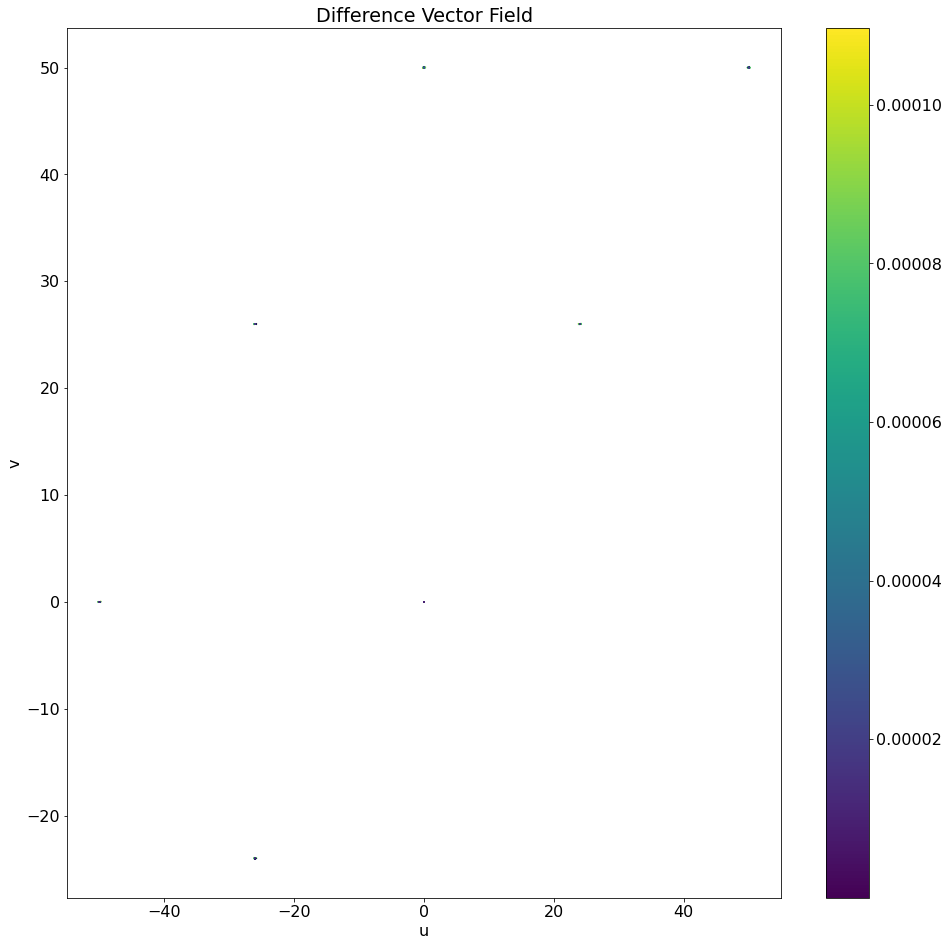

In [90]:
compare_uvw(ref_UV, viscpu_UV)

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
invalid value encountered in less_equal


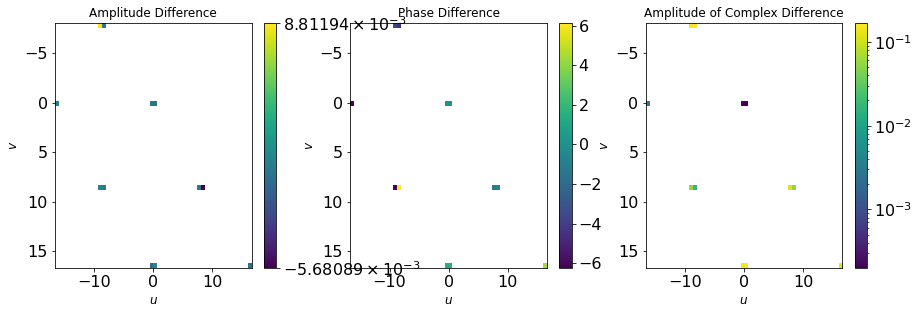

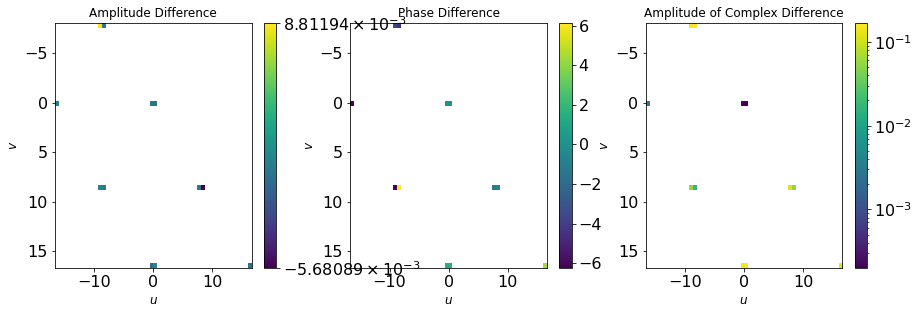

In [91]:
uvtools.plot.plot_diff_uv(ref_UV, viscpu_UV, check_metadata=False)

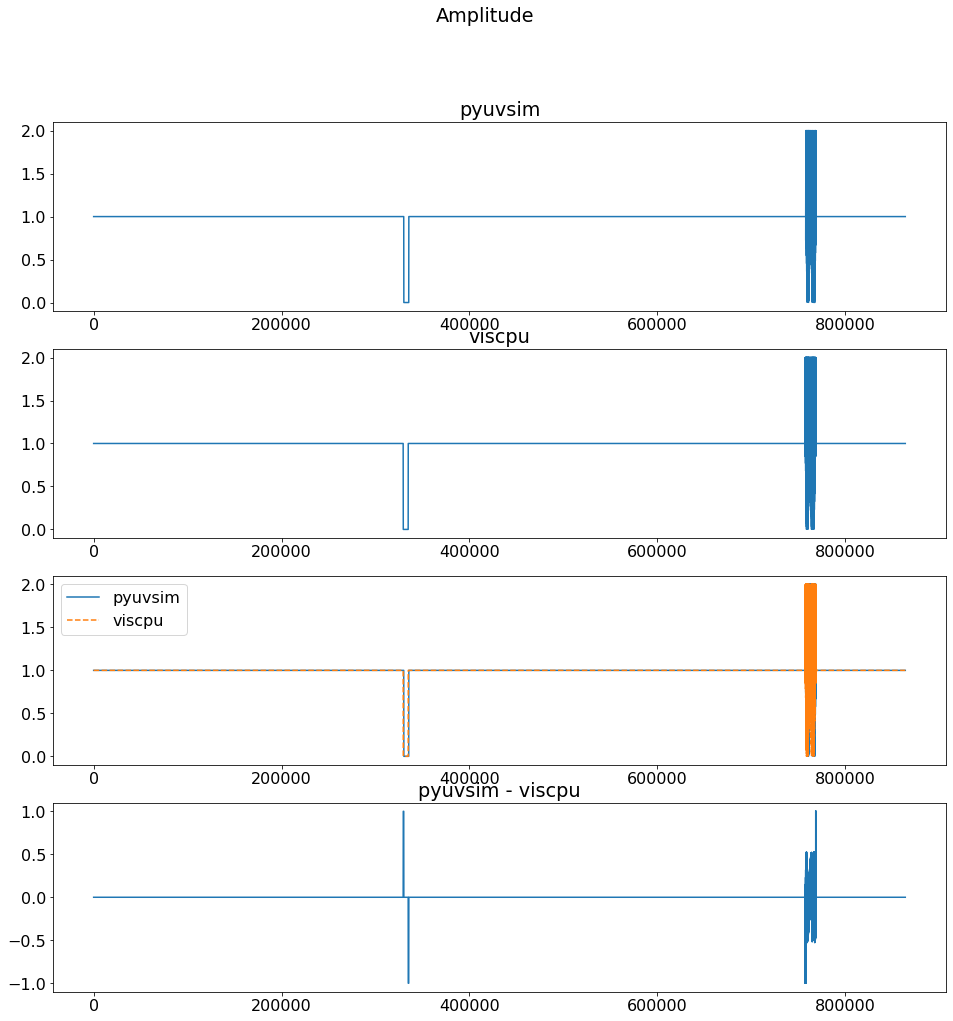

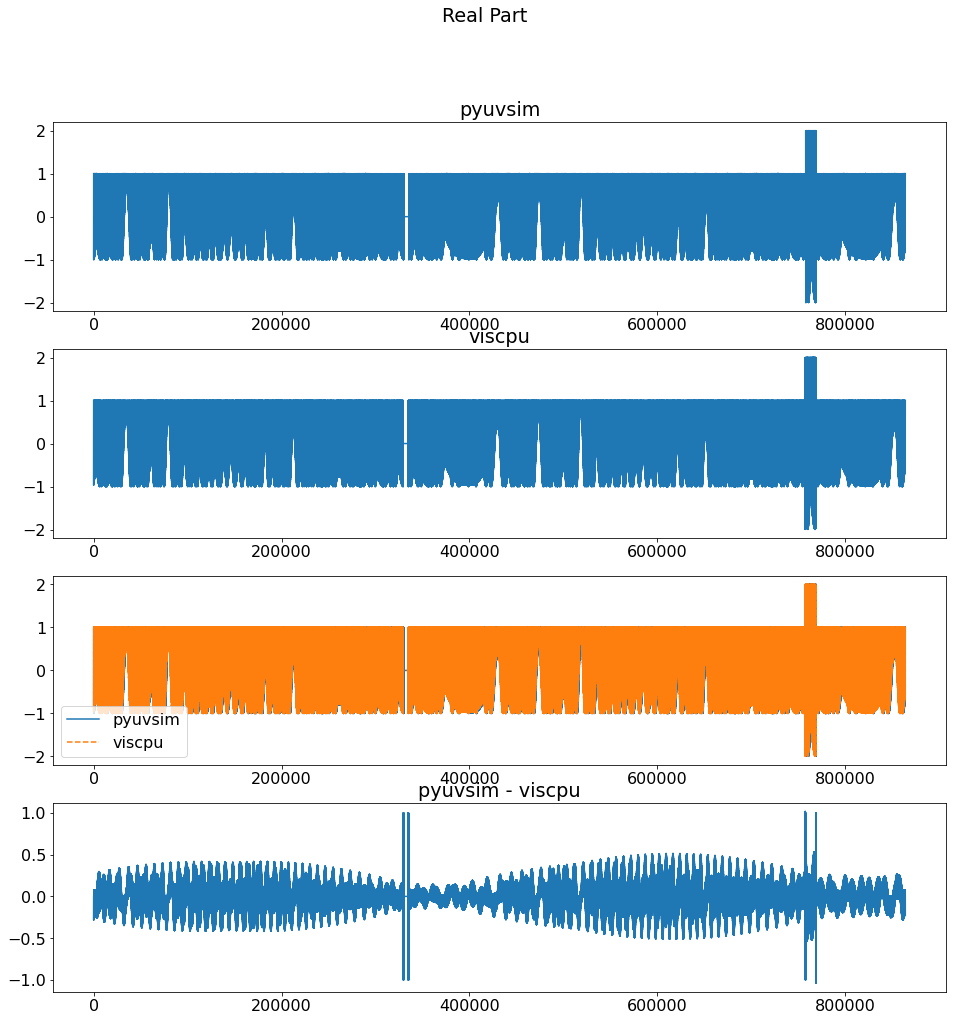

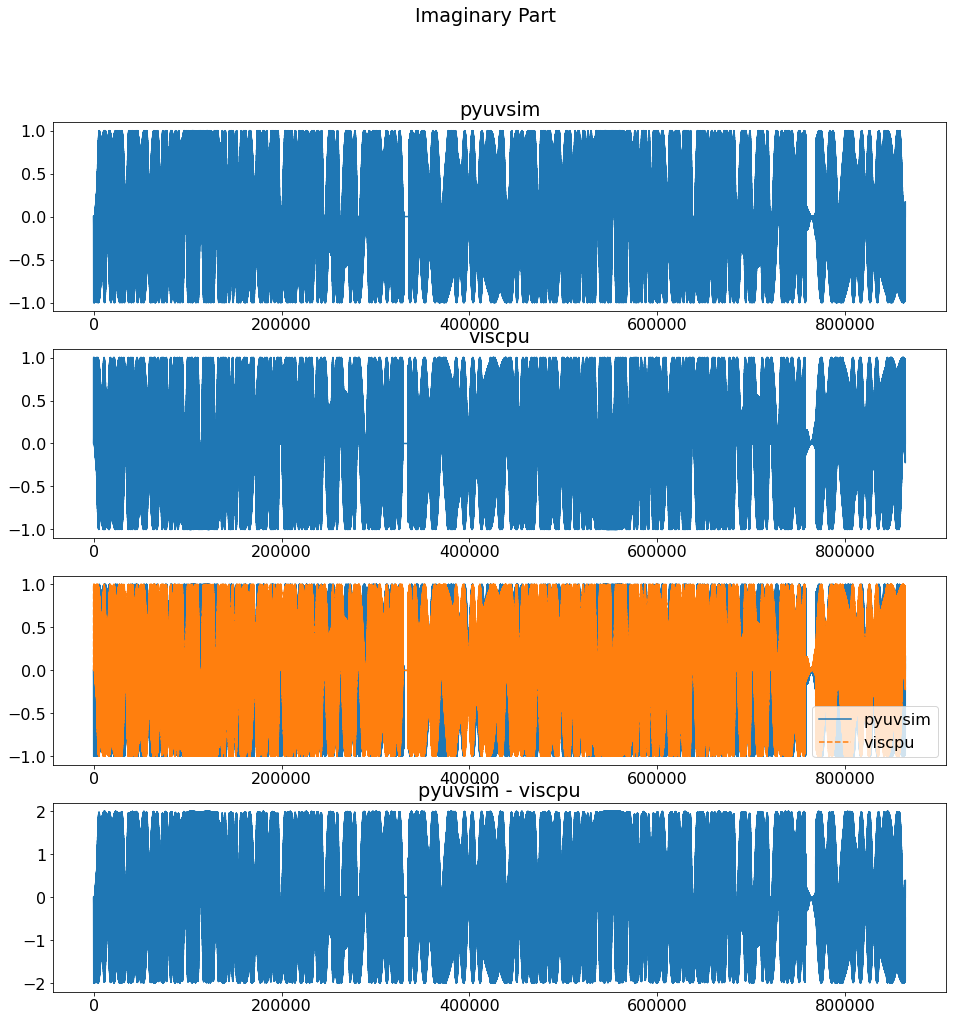

In [92]:
compare_vis(ref_UV, viscpu_UV)

### ref_1.2_gauss.uvfits

In [93]:
viscpu_sim = VisCPU(obsparams=obs_1_2_gauss)
viscpu_sim.simulate()
viscpu_UV = viscpu_sim.uvdata

invalid value encountered in sqrt


In [94]:
ref_UV = pyuvdata.UVData()
ref_UV.read(uvfits_ref_1_2_gauss)

Telescope BLLITE is not in known_telescopes.


In [95]:
print(np.max(np.abs(ref_UV.antenna_positions - viscpu_UV.antenna_positions)))

7.105427357601002e-15


In [96]:
ref_UV.unphase_to_drift()

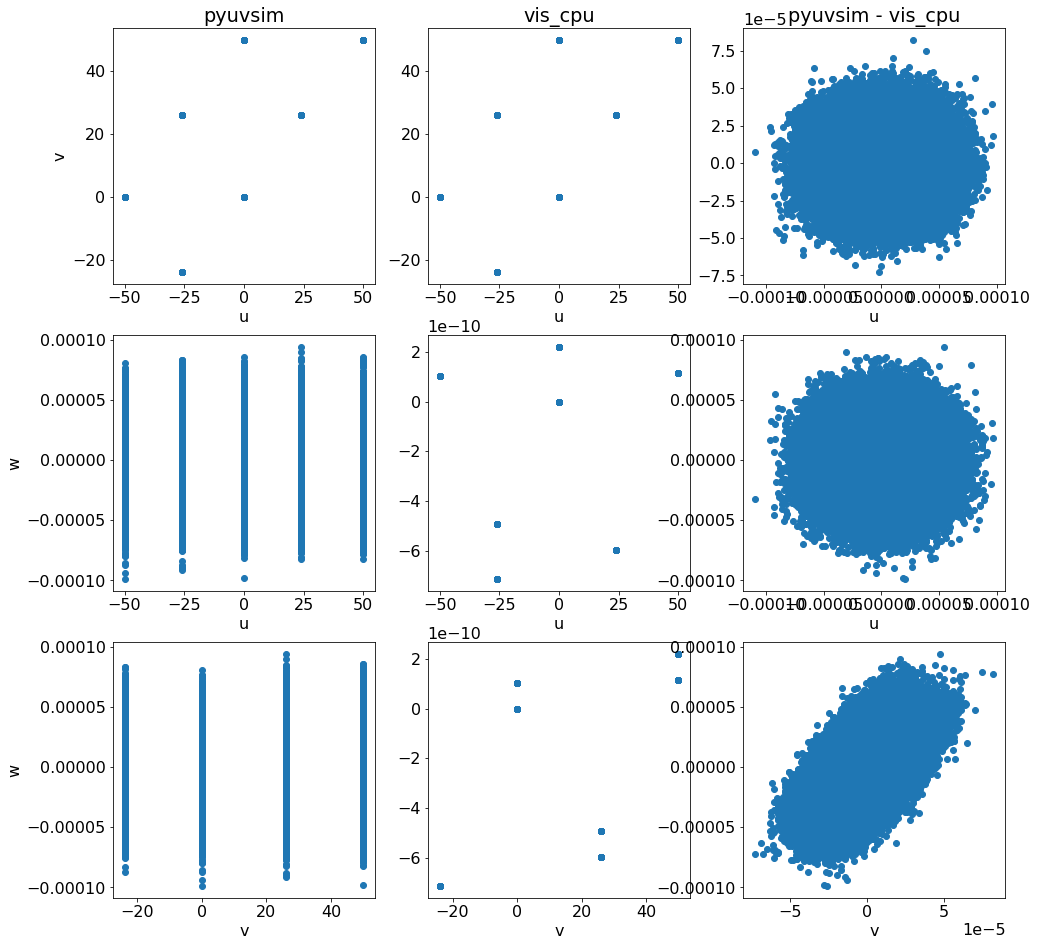

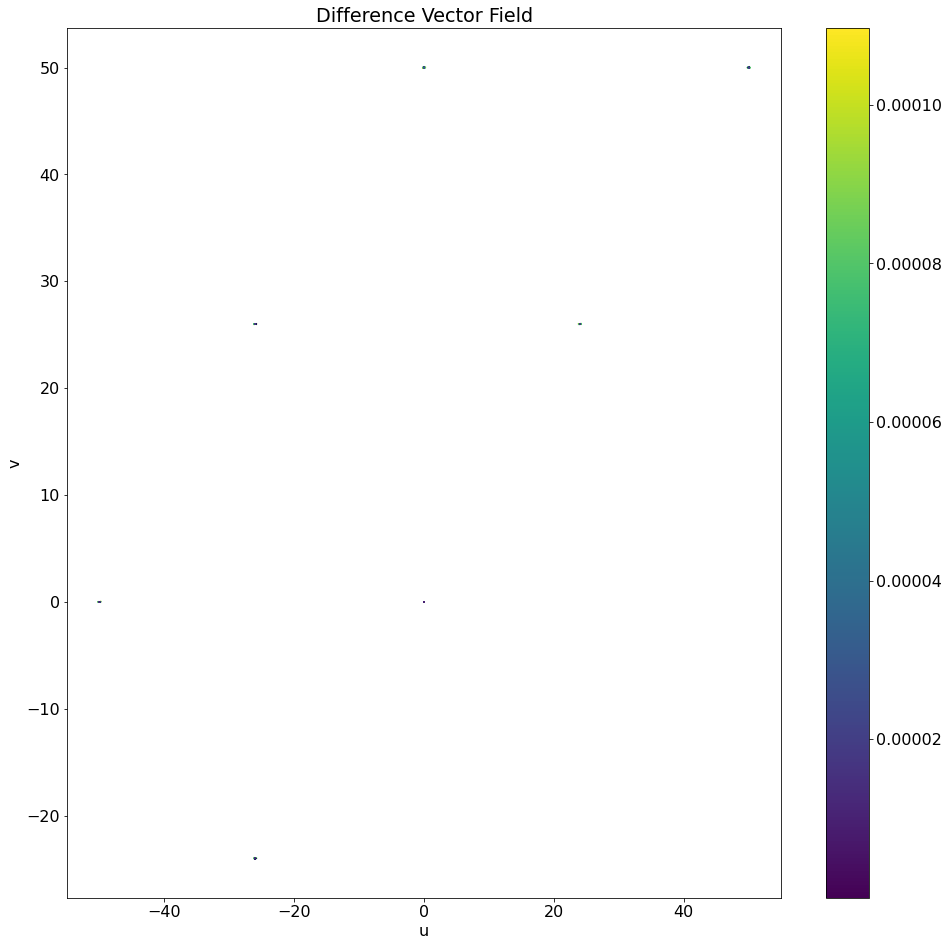

In [97]:
compare_uvw(ref_UV, viscpu_UV)

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
invalid value encountered in less_equal


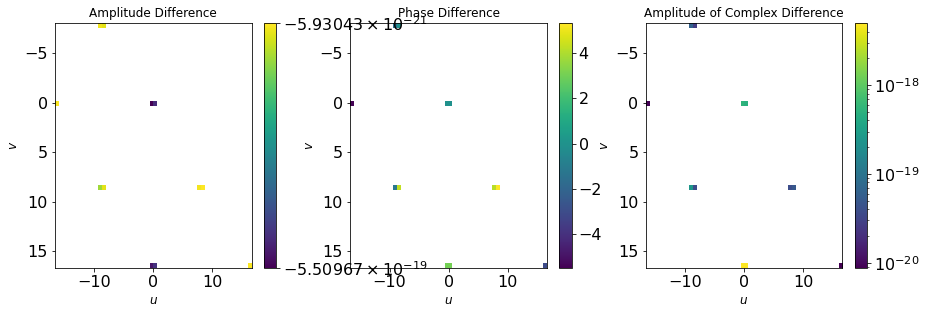

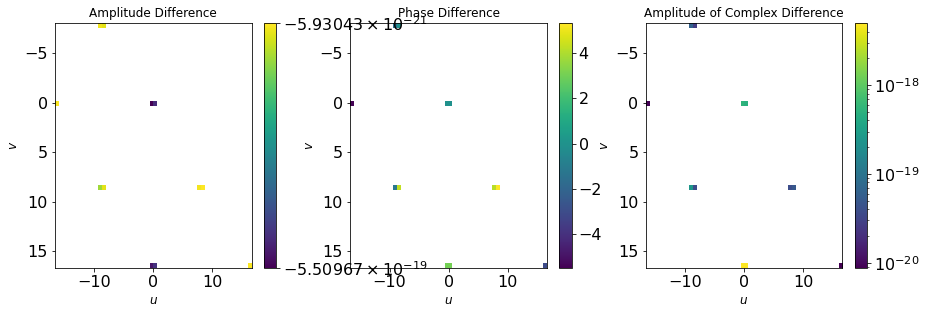

In [98]:
uvtools.plot.plot_diff_uv(ref_UV, viscpu_UV, check_metadata=False)

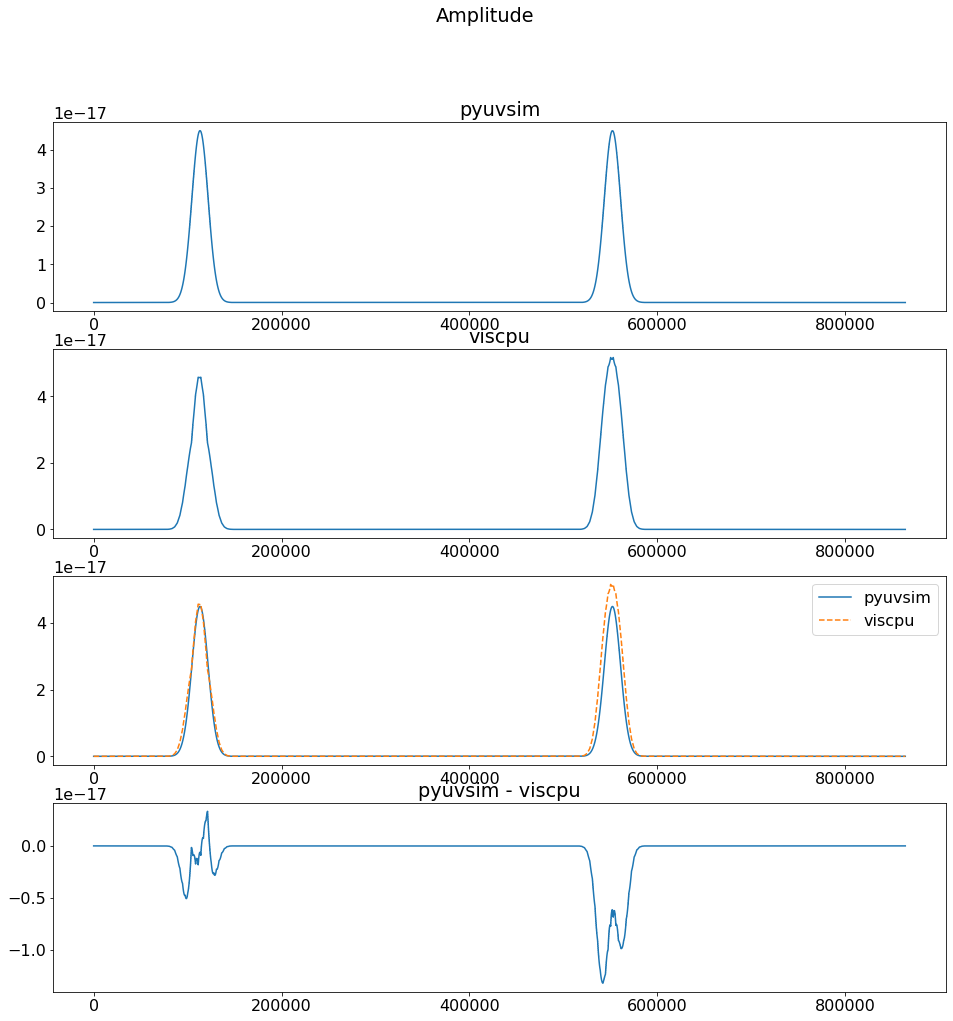

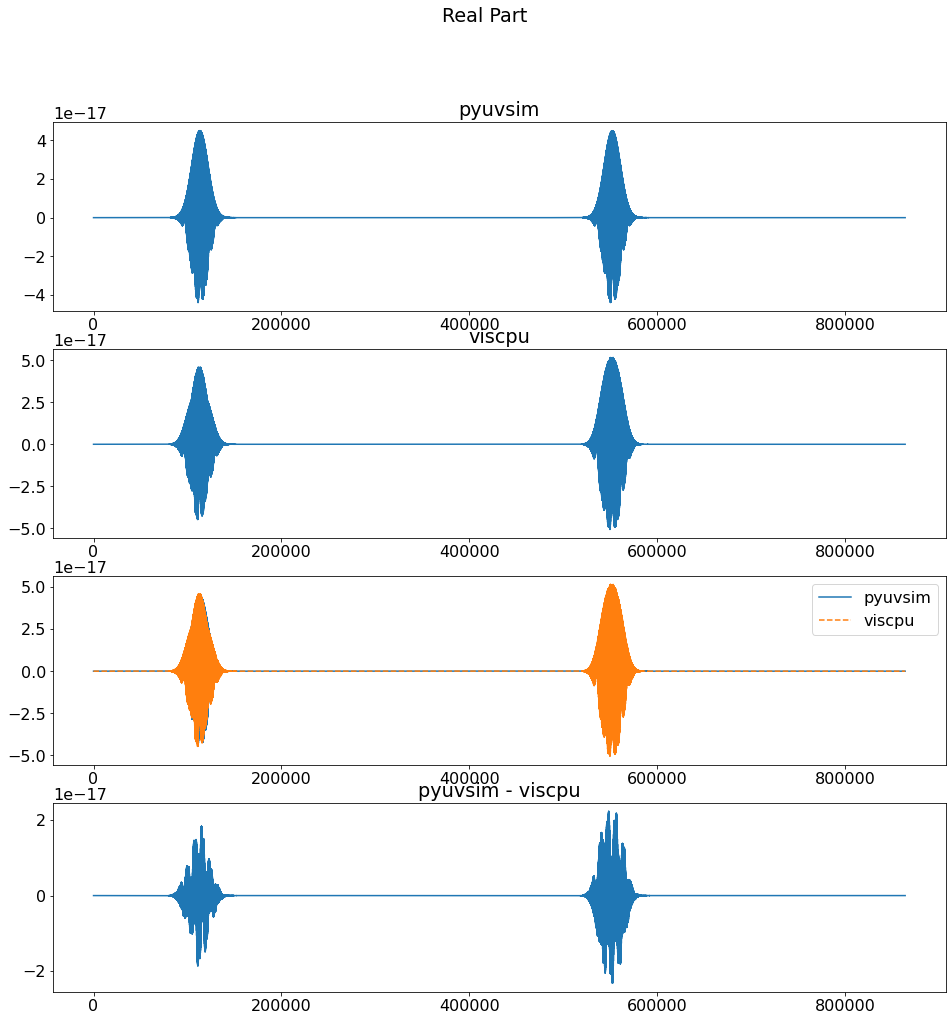

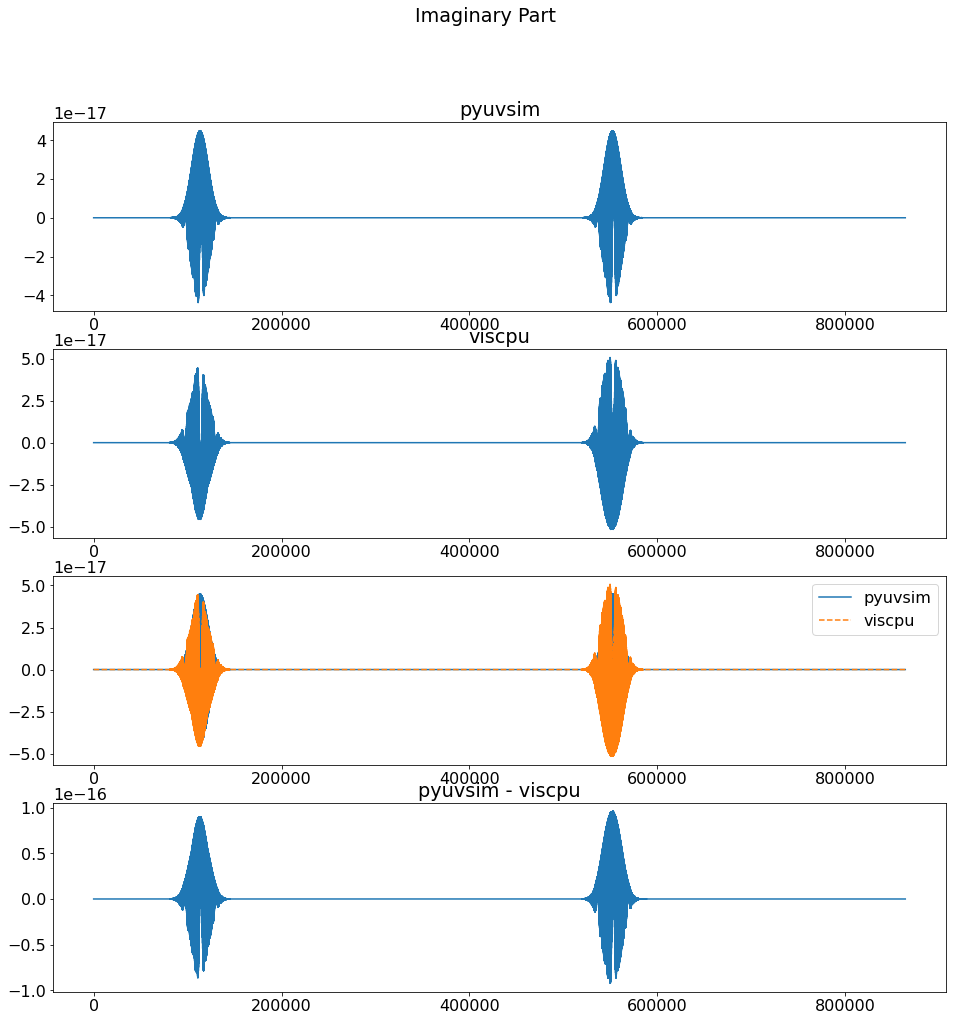

In [99]:
compare_vis(ref_UV, viscpu_UV)

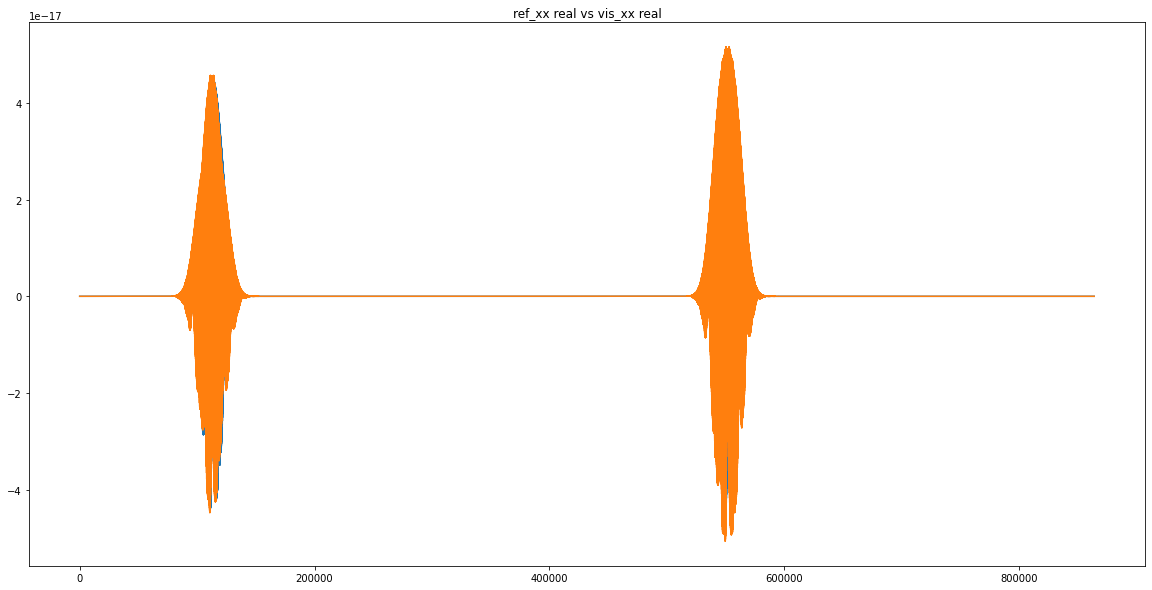

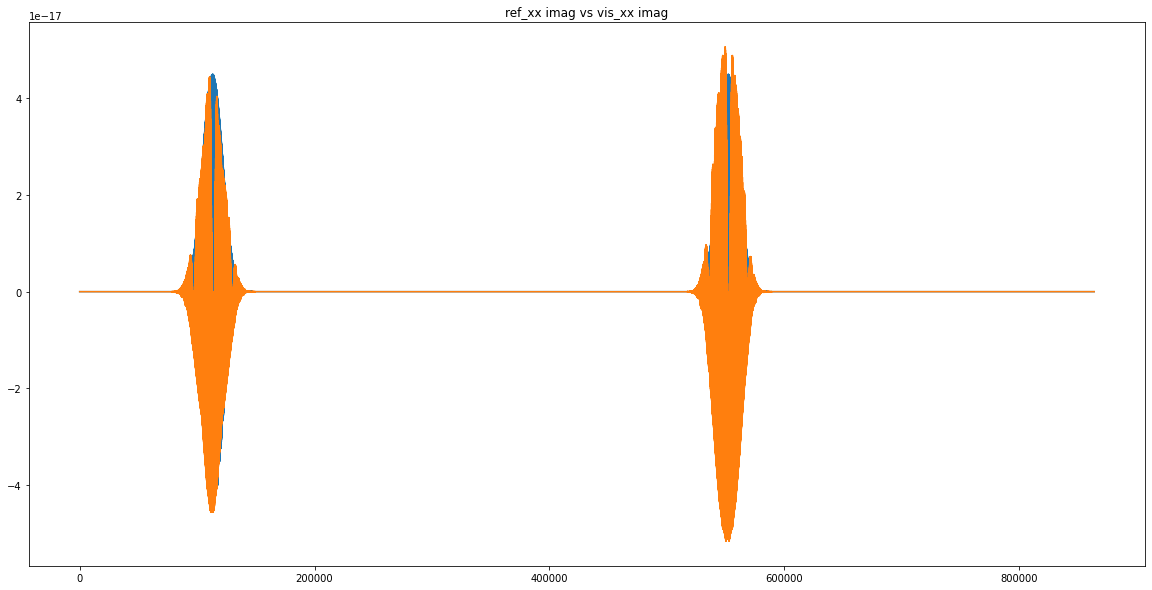

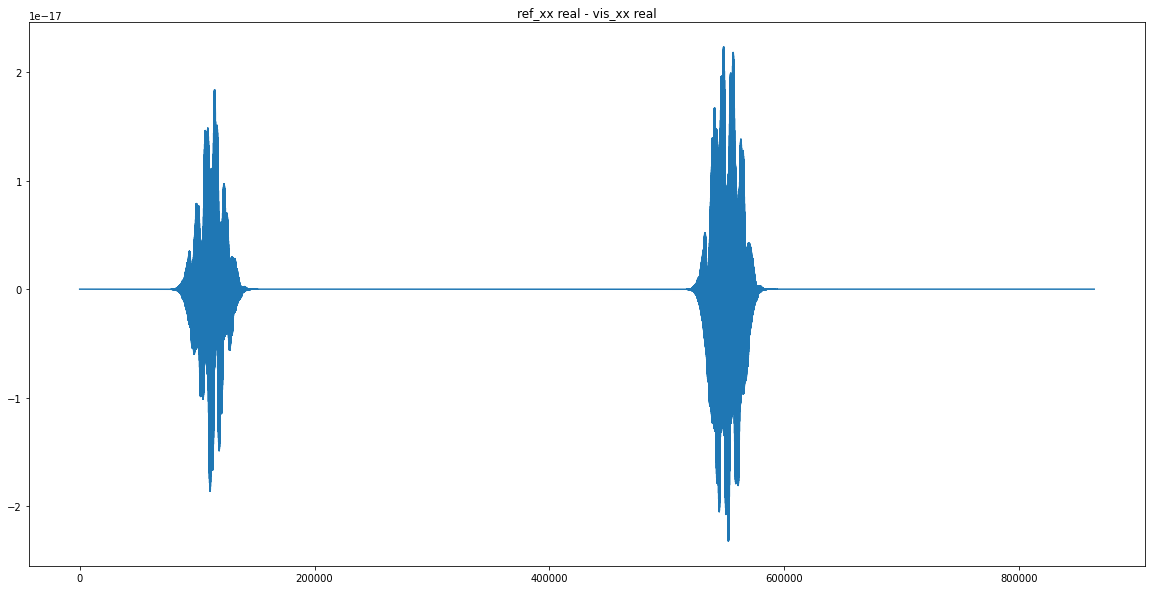

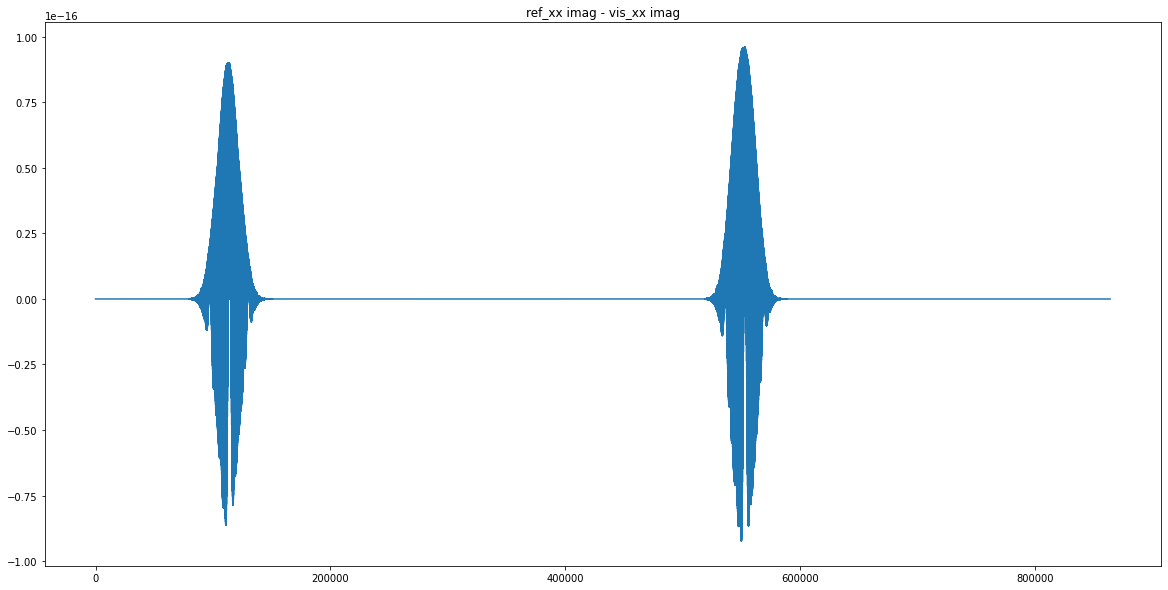

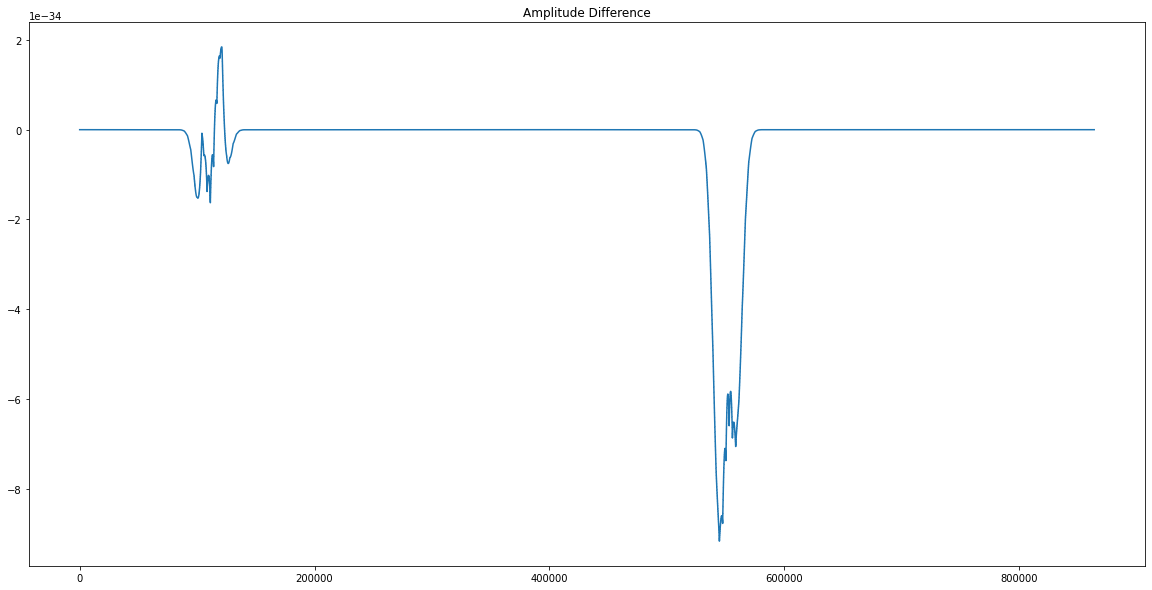

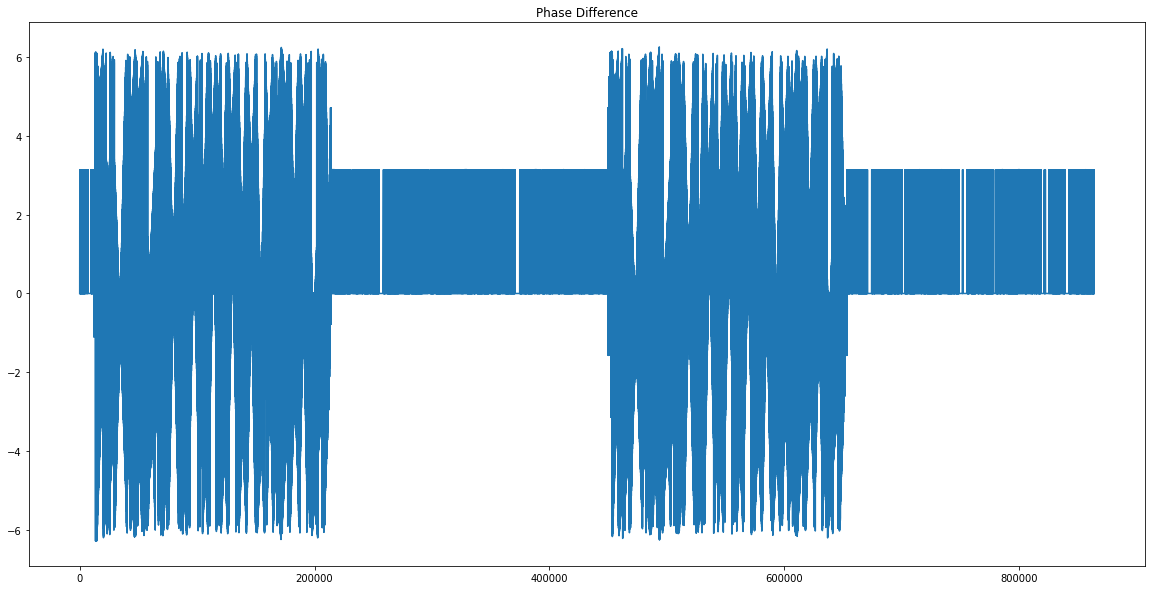

In [33]:
figsize = mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize'] = (20, 10)

plt.title("ref_xx real vs vis_xx real")
plt.plot(np.real(ref_xx))
plt.plot(np.real(vis_xx))
plt.figure()
plt.title("ref_xx imag vs vis_xx imag")
plt.plot(np.imag(ref_xx))
plt.plot(np.imag(vis_xx))
plt.figure()

plt.title("ref_xx real - vis_xx real")
plt.plot(np.real(ref_xx) - np.real(vis_xx))
plt.figure()
plt.title("ref_xx imag - vis_xx imag")
plt.plot(np.imag(ref_xx) - np.imag(vis_xx))
plt.figure()

plt.title("Amplitude Difference")
plt.plot(np.abs(ref_xx)**2 - np.abs(vis_xx)**2)
plt.figure()
plt.title("Phase Difference")
plt.plot(np.angle(ref_xx) - np.angle(vis_xx))

mpl.rcParams['figure.figsize'] = figsize

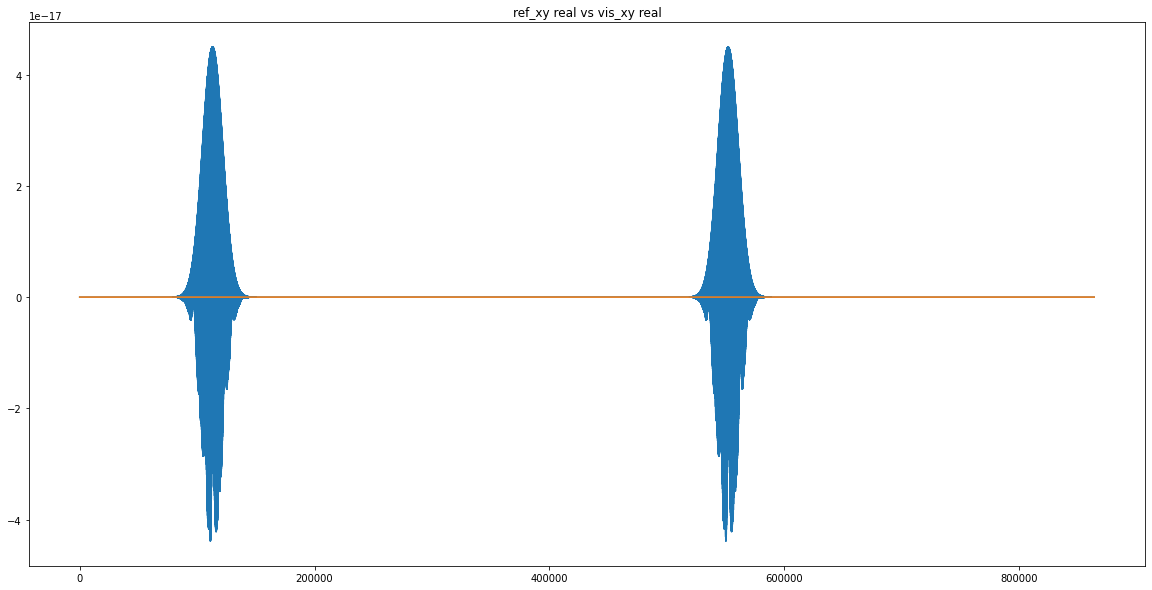

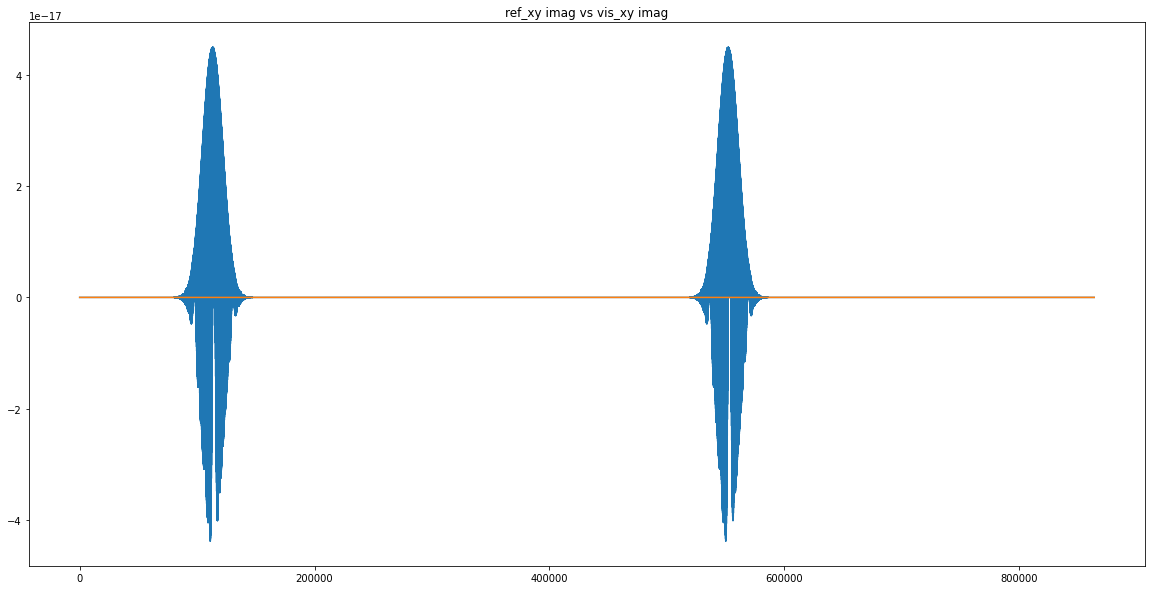

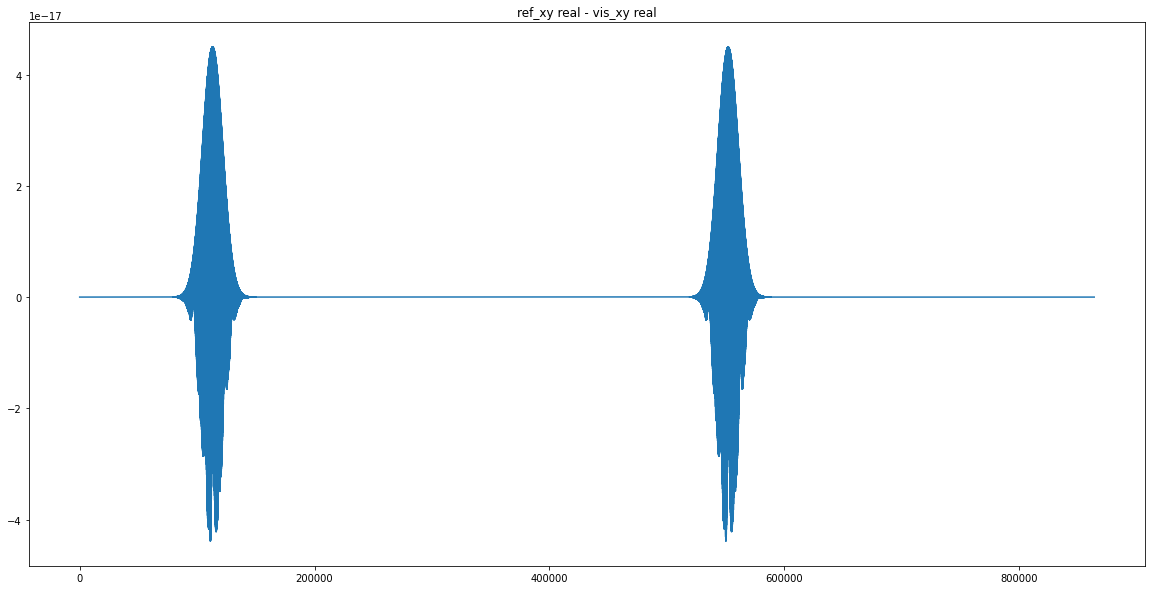

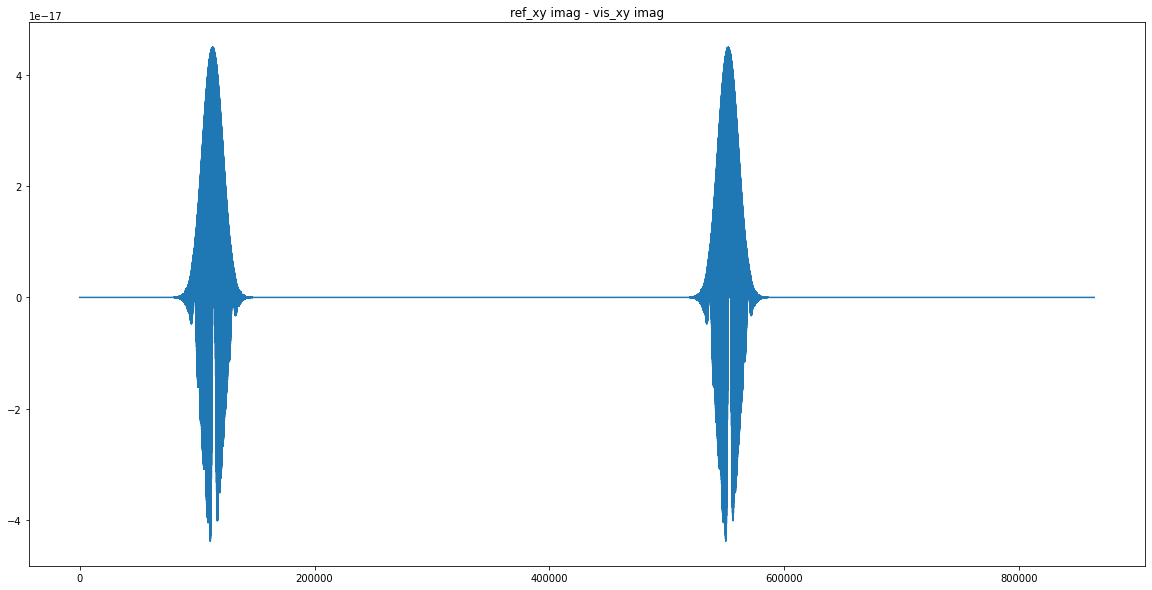

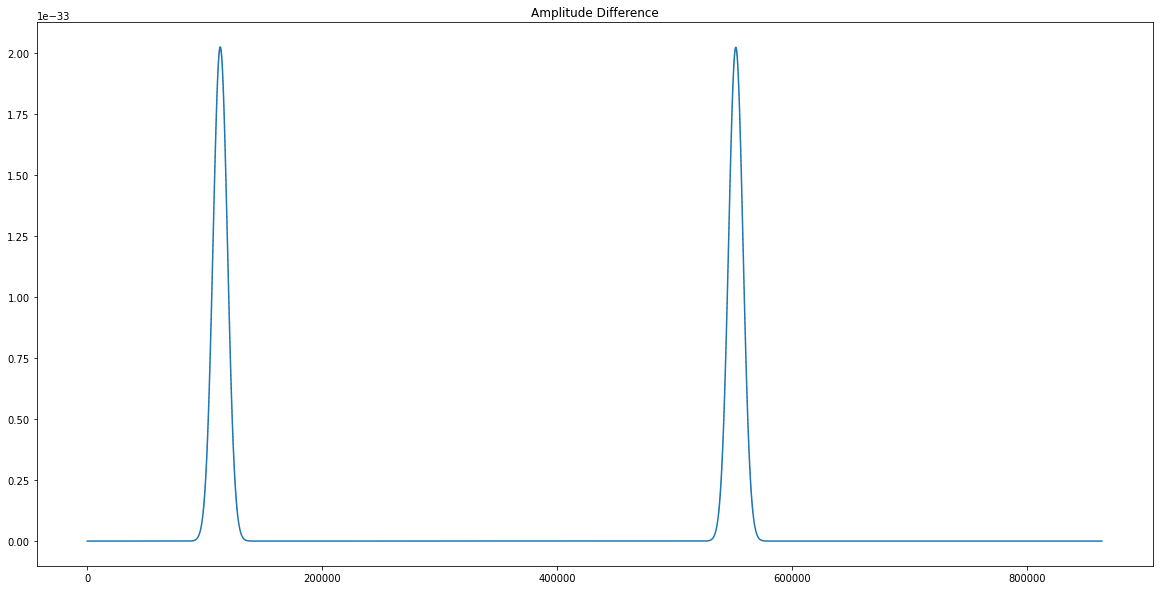

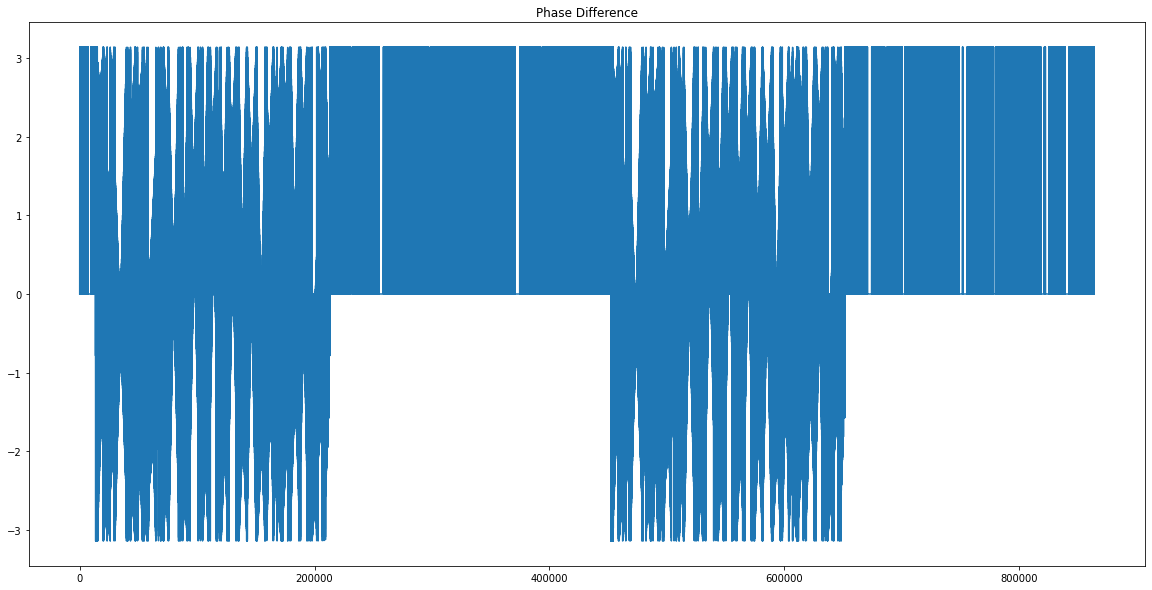

In [34]:
figsize = mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize'] = (20, 10)

plt.title("ref_xy real vs vis_xy real")
plt.plot(np.real(ref_xy))
plt.plot(np.real(vis_xy))
plt.figure()
plt.title("ref_xy imag vs vis_xy imag")
plt.plot(np.imag(ref_xy))
plt.plot(np.imag(vis_xy))
plt.figure()

plt.title("ref_xy real - vis_xy real")
plt.plot(np.real(ref_xy) - np.real(vis_xy))
plt.figure()
plt.title("ref_xy imag - vis_xy imag")
plt.plot(np.imag(ref_xy) - np.imag(vis_xy))
plt.figure()

plt.title("Amplitude Difference")
plt.plot(np.abs(ref_xy)**2 - np.abs(vis_xy)**2)
plt.figure()
plt.title("Phase Difference")
plt.plot(np.angle(ref_xy) - np.angle(vis_xy))

mpl.rcParams['figure.figsize'] = figsize


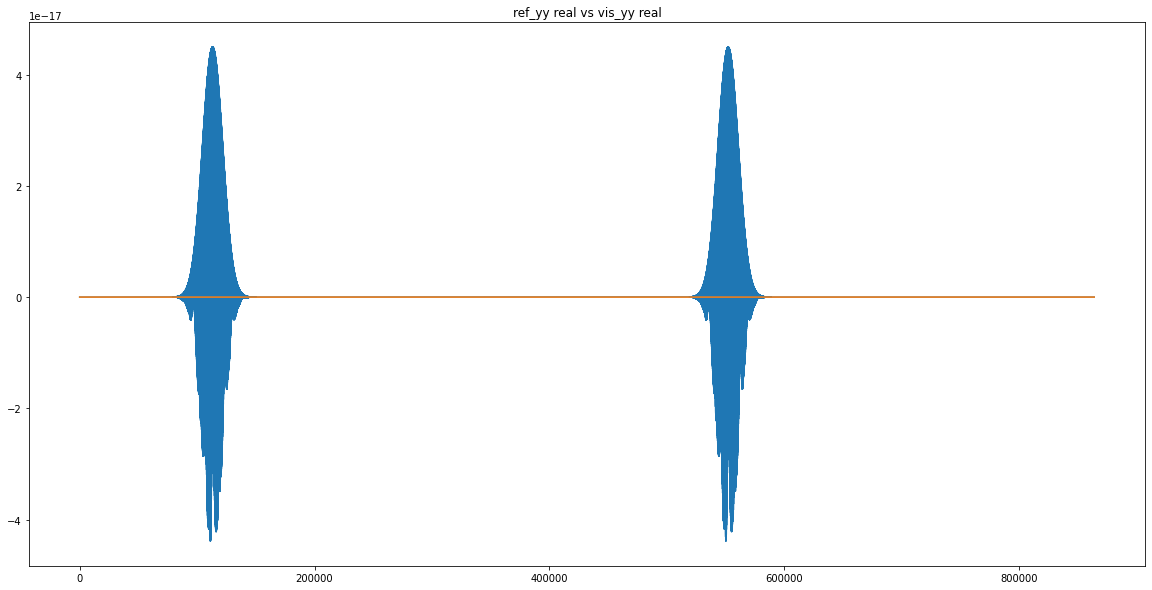

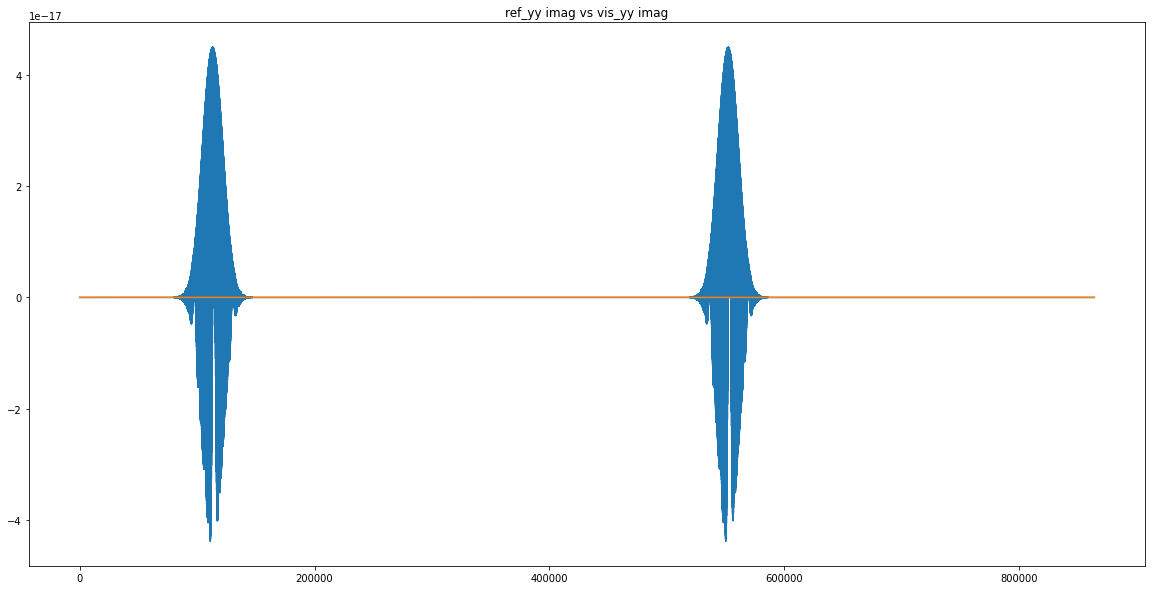

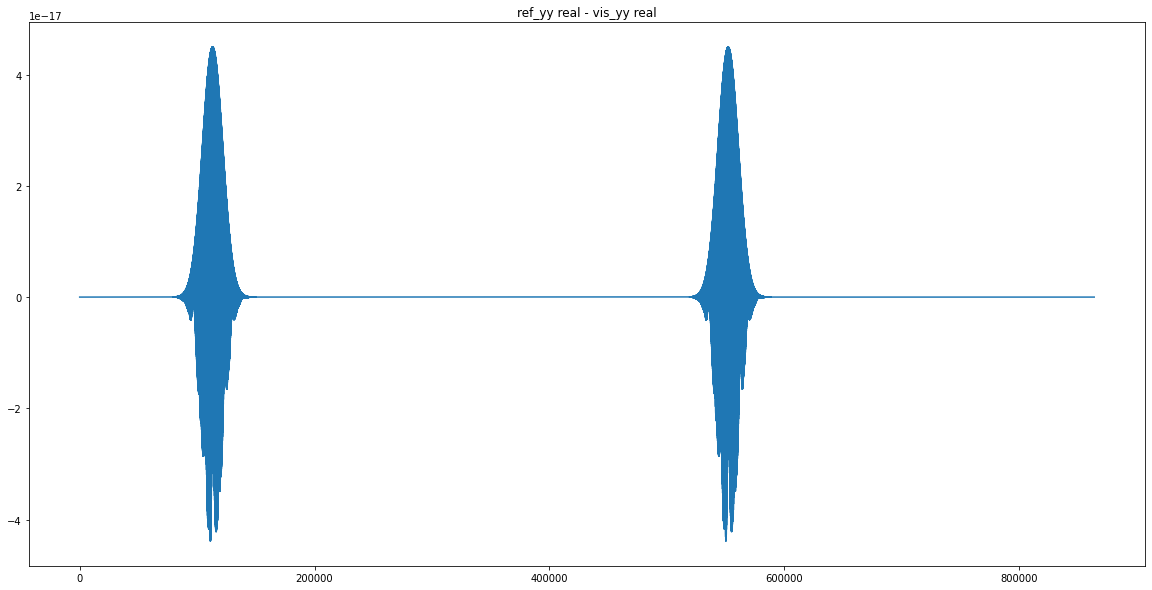

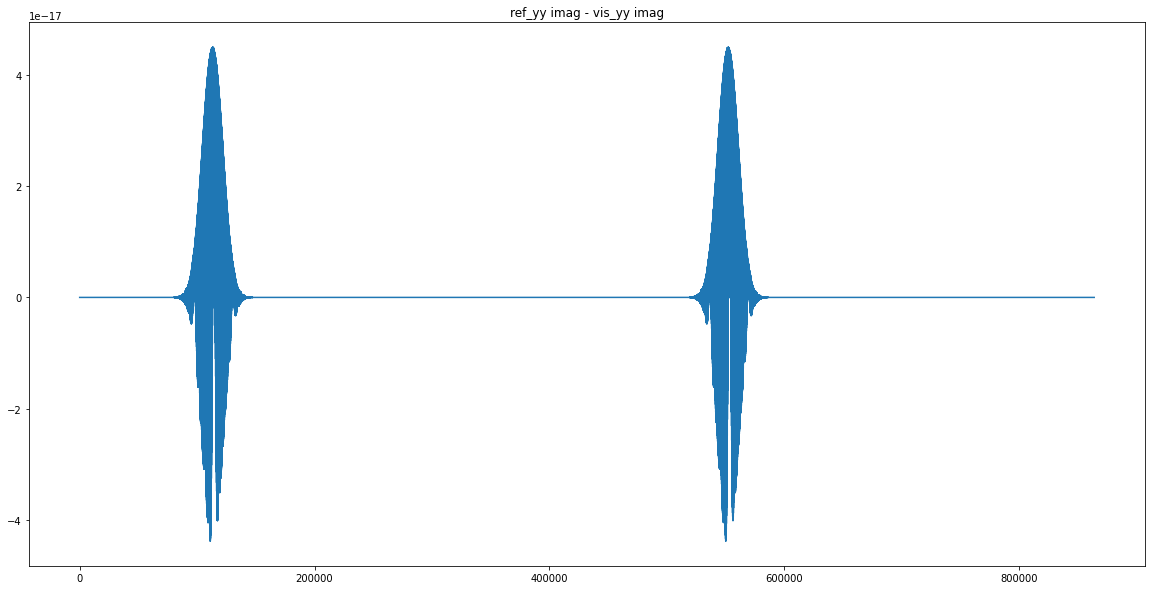

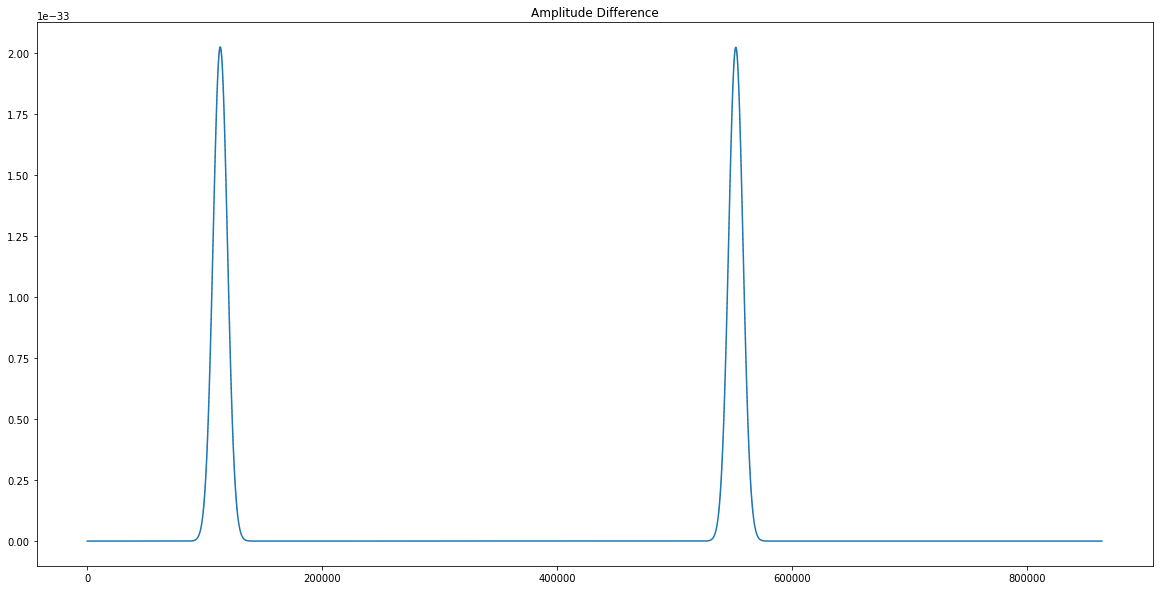

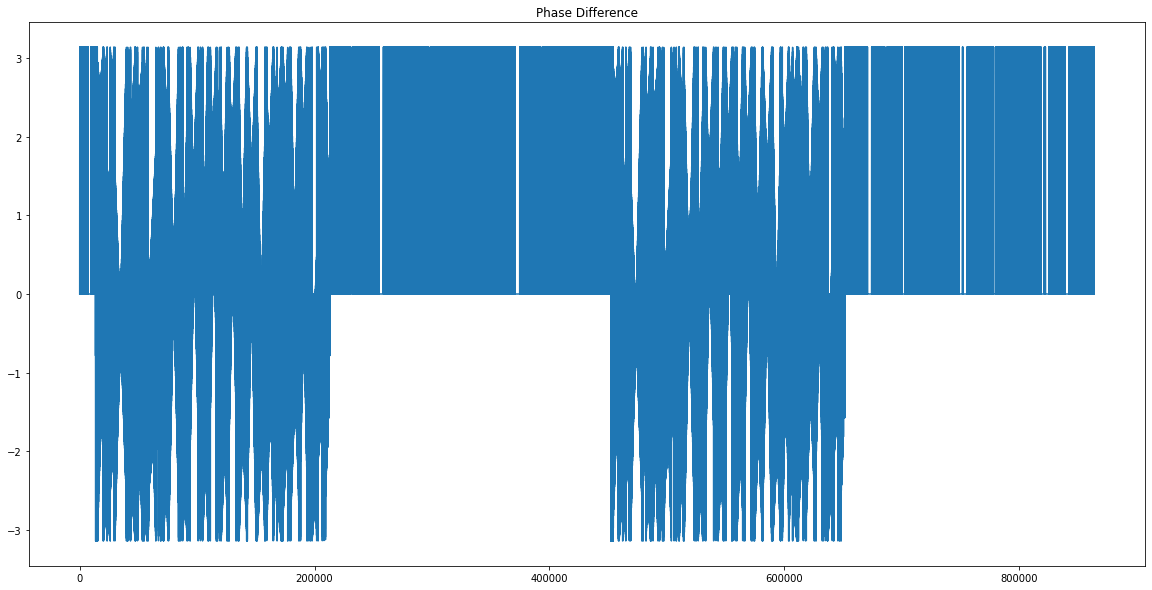

In [35]:
figsize = mpl.rcParams['figure.figsize']
mpl.rcParams['figure.figsize'] = (20, 10)

plt.title("ref_yy real vs vis_yy real")
plt.plot(np.real(ref_yy))
plt.plot(np.real(vis_yy))
plt.figure()
plt.title("ref_yy imag vs vis_yy imag")
plt.plot(np.imag(ref_yy))
plt.plot(np.imag(vis_yy))
plt.figure()

plt.title("ref_yy real - vis_yy real")
plt.plot(np.real(ref_yy) - np.real(vis_yy))
plt.figure()
plt.title("ref_yy imag - vis_yy imag")
plt.plot(np.imag(ref_yy) - np.imag(vis_yy))
plt.figure()

plt.title("Amplitude Difference")
plt.plot(np.abs(ref_yy)**2 - np.abs(vis_yy)**2)
plt.figure()
plt.title("Phase Difference")
plt.plot(np.angle(ref_yy) - np.angle(vis_yy))

mpl.rcParams['figure.figsize'] = figsize